In [274]:
# import sklearn

# 1.1 Метрика качества. Определения

In [275]:
# Метрика качества – это способ численно оценить модель на основе её предсказаний

In [276]:
# Функции с суффиксом _score 
# измеряют качество модели, основываясь на том, насколько хорошо модель выполняет свою задачу. 
# Эти функции возвращают чем больше, тем лучше: чем выше значение, тем более эффективна модель. 
# Как правило, такие функции применяются для оценки производительности модели на тестовых данных или в процессе кросс-валидации.

# Основная идея: метрики с суффиксом _score оценивают положительные аспекты модели, 
# и их значения варьируются в пределах от 0 до 1 (или, в случае регрессии, от минус бесконечности до некоторого максимума), 
# где чем выше, тем лучше.

In [277]:
# Функции с суффиксом _loss или _error, 
# наоборот, измеряют ошибки модели, то есть то, насколько плохо модель работает. 
# Эти функции возвращают чем меньше, тем лучше: минимизация потерь является целью обучения модели.

# Основная идея: метрики с суффиксом _loss или _error оценивают потери или ошибки, 
# и их значения варьируются от нуля (идеальное предсказание) до бесконечности, 
# где чем меньше значение, тем лучше модель.

In [278]:
# Таким образом, функции с суффиксом _score ориентированы на оценку успешности модели, 
# а функции с суффиксом _loss /_error измеряют потери и ошибки. 
# Их выбор зависит от контекста – обучения модели или её оценки.

In [279]:
# 1. Бинарная классификация:

# Суть: В задачах бинарной классификации каждый объект может быть отнесён к одному из двух классов. 
# Это наиболее простой и интуитивно понятный случай классификации.
# Пример: Классификация писем на "спам" или "не спам", диагностика болезни: "болен" или "здоров".
 

# 2. Многоклассовая классификация (multiclass classification):

# Суть: В задачах многоклассовой классификации каждый объект может принадлежать к одному из нескольких (трёх или более) классов. 
# При этом каждый объект относится только к одному классу.
# Пример: Распознавание цифр (0-9), предсказание типа животного (собака, кошка, птица).
 

# 3. Классификация с несколькими метками (multilabel classification):

# Суть: В задачах с несколькими метками каждый объект может принадлежать одновременно нескольким классам. 
# Это усложняет задачу, так как для каждого объекта нужно предсказать не одну метку, а набор меток.
# Пример: Тегирование фотографий, где изображение может содержать одновременно несколько объектов (например, "кошка", "дерево", "здание").

# 1.2 accuracy_score()

In [280]:
# Метрика accuracy (правильность классификации) – это один из самых простых и часто используемых способов измерения того, 
# насколько хорошо модель справляется с задачей. Он измеряет долю правильных предсказаний модели среди всех предсказаний.

# accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)

# Звёздочка (*) в сигнатуре функции accuracy_score() (и других функций в Python) означает, 
# что все параметры, которые следуют за ней, должны передаваться только по имени. 
# То есть такие аргументы нельзя передать позиционно, их нужно указывать явно по имени.

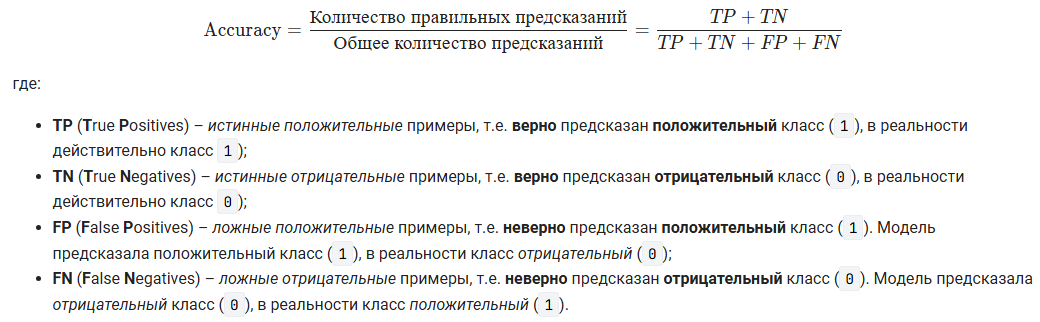

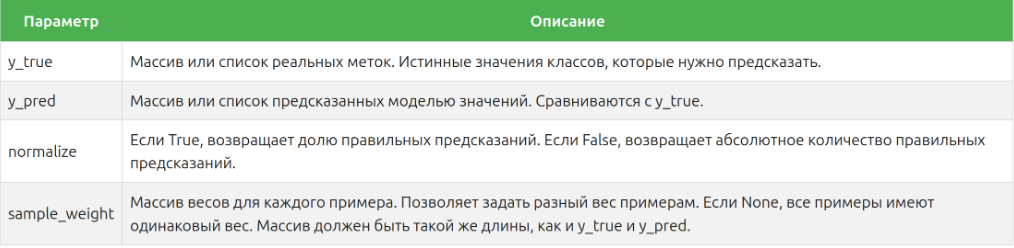

In [281]:
# Рассчитайте метрику accuracy при условии, что 
# положительный класс (1) имеет вес = 2, 
# а отрицательный класс (0) имеет вес = 1

from sklearn.metrics import accuracy_score
import numpy as np

y_true = [1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
y_pred = [1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0]

weight = np.where(np.array(y_true) == 1, 2, 1)
accuracy = accuracy_score(y_true, y_pred, sample_weight=weight)

accuracy = accuracy_score(y_true, y_pred, sample_weight=weight)

print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.68


In [282]:
y_true = [1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
y_pred = [1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0]

weights = {0: 1, 1: 2}

sample_weight = [weights[y] for y in y_true]

accuracy = accuracy_score(y_true, y_pred, sample_weight=sample_weight)

print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.68


In [283]:
y_true = [1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
y_pred = [1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0]

weights = {0: 1, 1: 2}

sample_weight = list(map(lambda x: weights[x], y_true))

accuracy = accuracy_score(y_true, y_pred, sample_weight=sample_weight)
accuracy2 = accuracy_score(y_true, y_pred, sample_weight=sample_weight, normalize=False)

print(f'Accuracy: {accuracy:.2f}')
print(f'Количество правильных предсказаний: {accuracy2}')

Accuracy: 0.68
Количество правильных предсказаний: 13.0


# 1.3  confusion_matrix()

In [284]:
# Матрица ошибок представляет собой квадратную таблицу, 
# в которой отображается количество предсказанных и фактических классов для классификационной модели. 
# В этой матрице строки представляют истинные классы (реальные метки), 
# а столбцы представляют предсказанные классы (метки, которые предсказала модель). 
# Размер матрицы соответствует количеству классов.

# confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)

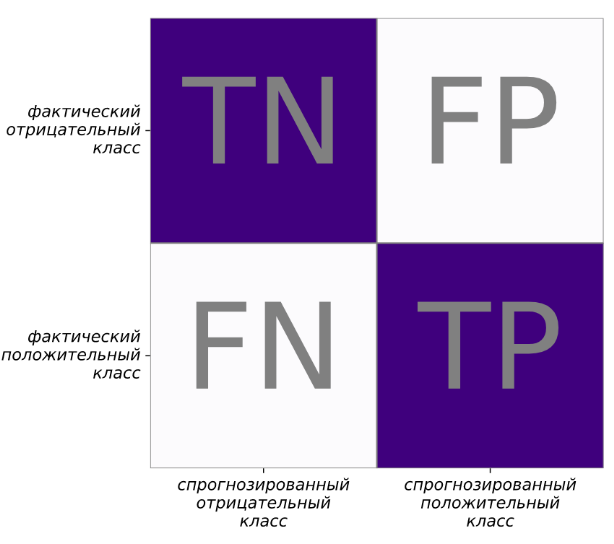

In [285]:
# В статистике ложноположительный пример (FP) называют ошибкой I рода, а ложноотрицательный (FN) – ошибкой II рода.

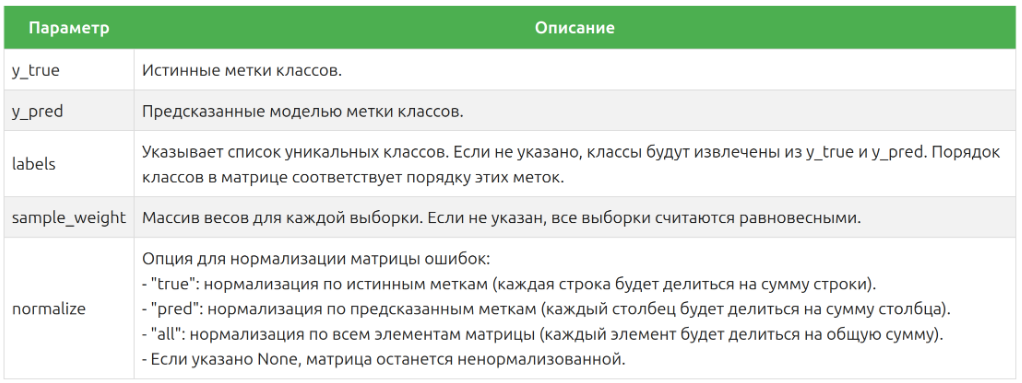

In [286]:
from sklearn.metrics import confusion_matrix

y_true = [0, 1, 0, 0, 1, 0, 1, 1, 0]  # Истинные метки классов
y_pred = [0, 0, 0, 0, 1, 0, 1, 1, 0]  # Предсказанные метки классов

cm = confusion_matrix(y_true, y_pred)
cm

array([[5, 0],
       [1, 3]], dtype=int64)

In [287]:
y_true = [0, 1, 2, 2, 1, 0, 1, 1, 0, 2, 1, 1, 0, 2, 0]  # Истинные метки классов
y_pred = [0, 0, 0, 2, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1]  # Предсказанные метки классов

cm = confusion_matrix(y_true, y_pred)
cm

array([[4, 1, 0],
       [1, 5, 0],
       [2, 1, 1]], dtype=int64)

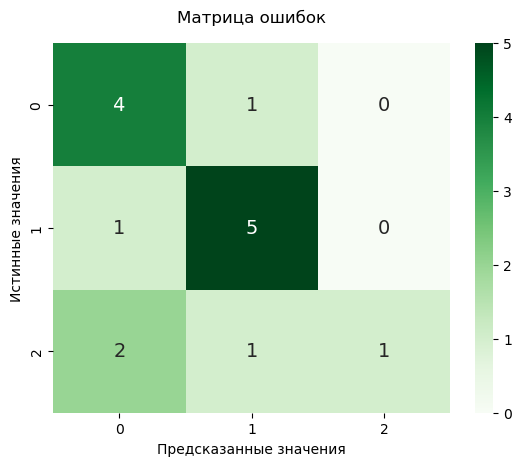

In [288]:
import seaborn as sns
import matplotlib.pyplot as plt

# Построение тепловой карты
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', annot_kws={'fontsize': 14})
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')
plt.title('Матрица ошибок', pad=15)
plt.show()

In [289]:
# Параметр labels функции confusion_matrix() 
# позволяет задать порядок классов, для которых будет построена матрица ошибок, 
# а также указать, какие именно классы включить в матрицу.

y_true = ['корова', 'лошадь', 'кошка', 'кошка', 'лошадь', 'корова', 'корова', 'лошадь', 'лошадь']
y_pred = ['лошадь', 'лошадь', 'кошка', 'кошка', 'корова', 'лошадь', 'корова', 'лошадь', 'лошадь']

cm = confusion_matrix(y_true, y_pred, labels=['лошадь', 'корова'])
cm

array([[3, 1],
       [2, 1]], dtype=int64)

In [290]:
# Параметр normalize функции confusion_matrix() управляет нормализацией матрицы ошибок. 
# Нормализация позволяет представить значения в относительных долях или процентах, а не в абсолютных значениях.

cm = confusion_matrix(y_true, y_pred, normalize='true')
cm

array([[0.33333333, 0.        , 0.66666667],
       [0.        , 1.        , 0.        ],
       [0.25      , 0.        , 0.75      ]])

In [291]:
# Вариант normalize='pred' нормализует по предсказанным меткам, то есть по столбцам.
# Каждый элемент матрицы делится на сумму элементов своей колонки. 
# Это позволяет видеть, насколько уверенно модель классифицирует примеры в каждый класс. 
# Например, если модель часто ошибочно предсказывает какой-то класс, 
# это будет отражено высокой нормализованной долей в этой колонке.

y_true = ['корова', 'лошадь', 'кошка', 'кошка', 'лошадь', 'корова', 'корова', 'лошадь', 'лошадь']
y_pred = ['лошадь', 'лошадь', 'кошка', 'кошка', 'корова', 'лошадь', 'корова', 'лошадь', 'лошадь']

cm = confusion_matrix(y_true, y_pred, normalize='pred')
cm

array([[0.5, 0. , 0.4],
       [0. , 1. , 0. ],
       [0.5, 0. , 0.6]])

In [292]:
# Если normalize='all', то происходит нормализация по всей матрице, 
# то есть каждый элемент делится на общее количество предсказаний. 
# Таким образом, каждый элемент матрицы отражает долю всех предсказаний, которые попали в конкретную ячейку. 
# Это даёт общее представление о том, насколько часто модель делает правильные предсказания или ошибается.

y_true = ['корова', 'лошадь', 'кошка', 'кошка', 'лошадь', 'корова', 'корова', 'лошадь', 'лошадь']
y_pred = ['лошадь', 'лошадь', 'кошка', 'кошка', 'корова', 'лошадь', 'корова', 'лошадь', 'лошадь']

cm = confusion_matrix(y_true, y_pred, normalize='all')
cm

array([[0.11111111, 0.        , 0.22222222],
       [0.        , 0.22222222, 0.        ],
       [0.11111111, 0.        , 0.33333333]])

In [293]:
# Воспользуемся данными датасета digits библиотеки scikit-learn.

# В датасете digits содержатся изображения рукописных цифр (от 0 до 9) размером 8x8 пикселей, 
# и каждый пиксель изображения представлен числовым значением интенсивности (оттенка серого). 
# Столбцы с именами pixel_0_0, pixel_0_1, ..., pixel_7_7 представляют собой значения интенсивности пикселей в этих изображениях.

# Столбцы названы в формате pixel_<row>_<col>, где <row> – это индекс строки (от 0 до 7), а <col> – индекс столбца (от 0 до 7).

# Каждое значение в этих столбцах – это числовое значение интенсивности пикселя, обычно в диапазоне от 0 до 16, где:

# 0 представляет собой белый цвет (отсутствие чернил).
# 16 представляет собой чёрный цвет (полностью закрашенный пиксель).


import pandas as pd
from sklearn.datasets import load_digits

# Загрузка датасета digits
digits = load_digits()

# Преобразование данных в DataFrame
# digits.data содержит массив с признаками, а digits.target - целевые значения
df = pd.DataFrame(data=digits.data, columns=digits.feature_names)

# Добавление колонки с метками классов
df['target'] = digits.target

# Просмотр последних 5 строк DataFrame
display(df.tail())

pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
1792        0.0        0.0        4.0       10.0       13.0        6.0   
1793        0.0        0.0        6.0       16.0       13.0       11.0   
1794        0.0        0.0        1.0       11.0       15.0        1.0   
1795        0.0        0.0        2.0       10.0        7.0        0.0   
1796        0.0        0.0       10.0       14.0        8.0        1.0   

      pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_7  pixel_7_0  \
1792        0.0        0.0        0.0        1.0  ...        0.0        0.0   
1793        1.0        0.0        0.0        0.0  ...        0.0        0.0   
1794        0.0        0.0        0.0        0.0  ...        0.0        0.0   
1795        0.0        0.0        0.0        0.0  ...        0.0        0.0   
1796        0.0        0.0        0.0        2.0  ...        0.0        0.0   

      pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  pixel_7_6  \
1792        0.0        2.0       14.0       15.0        9.0        0.0   
1793        0.0        6.0       16.0       14.0        6.0        0.0   
1794        0.0        2.0        9.0       13.0        6.0        0.0   
1795        0.0        5.0       12.0       16.0       12.0        0.0   
1796        1.0        8.0       12.0       14.0       12.0        1.0   

      pixel_7_7  target  
1792        0.0       9  
1793        0.0       0  
1794        0.0       8  
1795        0.0       9  
1796        0.0       8  

[5 rows x 65 columns]

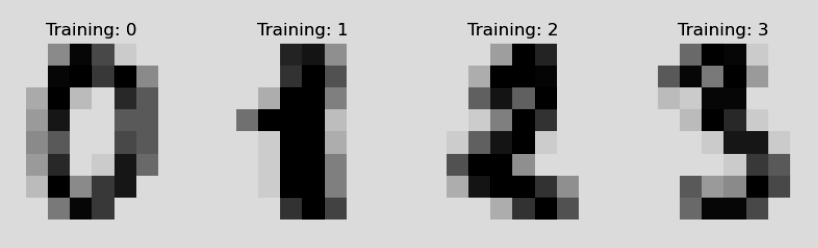

In [294]:
# Разделим данные на признаки и целевую переменную:

X = df.drop('target', axis=1)
y = df['target']

print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [295]:
# Далее разделим данные на обучающие и тестовые выборки:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [296]:
# Для демонстрации работы функции confusion_matrix() будем использовать модель случайного леса. 
# Создадим объект класса RandomForestClassifier(), 
# затем обучим модель и сделаем предсказания, 
# а далее при помощи функции confusion_matrix() сформируем матрицу ошибок и выведем её на печать:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

model = RandomForestClassifier(random_state=42)

# Обучение модели
model.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[52  0  0  0  1  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 52  0  0  0  0  2  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  1 63  1  0  0  1]
 [ 0  0  0  0  0  1 52  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  1]
 [ 0  2  0  0  0  0  0  0 41  0]
 [ 0  0  0  1  0  1  0  1  0 56]]


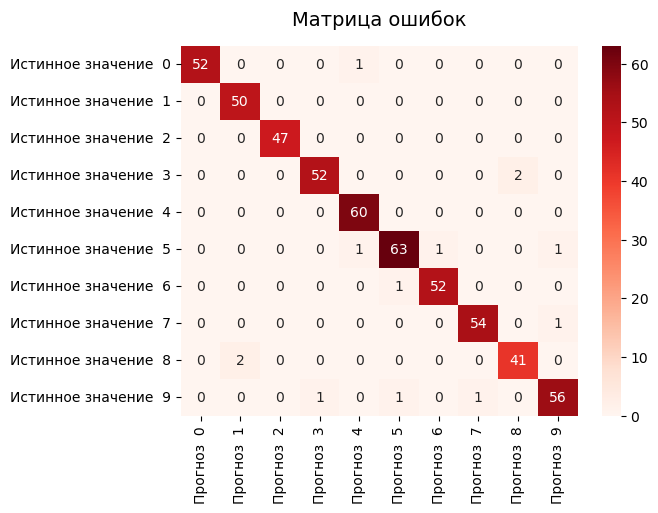

In [297]:
# Для более наглядного отображения матрицы ошибок, построим тепловую карту:

sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=[f'Прогноз  {i}' for i in range(10)],
            yticklabels=[f'Истинное значение  {i}' for i in range(10)])
plt.title('Матрица ошибок', pad=15, fontsize=14)
plt.show()

In [298]:
y_true = [1, 2, 1, 2, 0, 1, 0, 1, 1, 2, 2, 1, 0, 2, 1]  # Истинные метки классов
y_pred = [2, 2, 1, 2, 1, 0, 1, 0, 2, 0, 2, 1, 0, 1, 1]  # Предсказанные метки классов

cm = confusion_matrix(y_true, y_pred)

print(cm)

[[1 2 0]
 [2 3 2]
 [1 1 3]]


# 1.4 multilabel_confusion_matrix()

In [299]:
# Функция multilabel_confusion_matrix()
# используется для построения матриц ошибок для каждой метки (или класса) в многометочной классификации. 
# Она расширяет стандартную матрицу ошибок, которая обычно применяется для бинарной или многоклассовой классификации, 
# на многометочные задачи, где каждый образец может принадлежать нескольким классам одновременно.

# Многометочная классификация – это ситуация, когда один и тот же образец может иметь несколько меток. 
# Например, изображение может быть одновременно отмечено как «собака», «животное» и «питомец».
# Для каждого класса строится отдельная бинарная матрица ошибок, которая показывает, 
# как правильно или неправильно были предсказаны метки для данной категории.

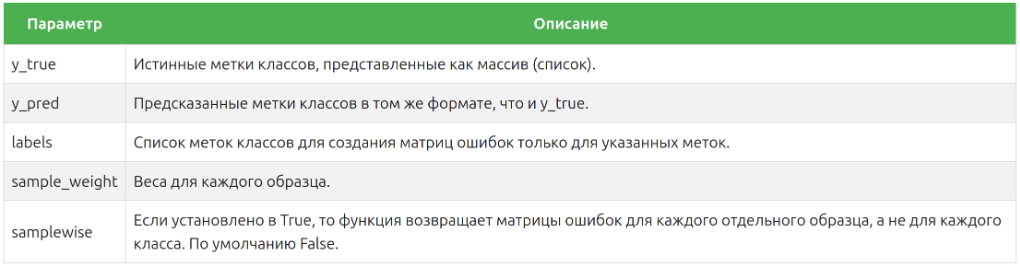

Данные для матрицы ошибок<br><br>
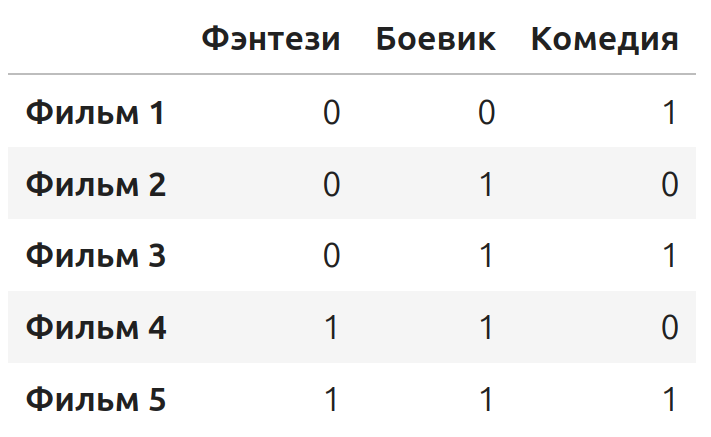

In [300]:
from sklearn.metrics import multilabel_confusion_matrix

# Истинные метки классов
y_true = [[0, 0, 1], 
          [0, 1, 0], 
          [0, 1, 1], 
          [1, 1, 0], 
          [1, 1, 1]]

# Предсказанные метки классов
y_pred = [[1, 0, 0], 
          [0, 1, 1], 
          [1, 0, 1], 
          [1, 1, 0], 
          [1, 1, 1]]

# Вычисление многометочных матриц ошибок
mcm = multilabel_confusion_matrix(y_true, y_pred)

print(mcm)

# В итоге сформировались три матрицы ошибок – по одной для каждого класса. 
# Первая матрица – для класса "Фэнтези", 
# вторая – для "Боевик" и 
# третья – для "Комедия".

[[[1 2]
  [0 2]]

 [[1 0]
  [1 3]]

 [[1 1]
  [1 2]]]


In [301]:
# Параметр samplewise функции multilabel_confusion_matrix() позволяет получать более детальную информацию о работе модели, 
# разбивая результаты по каждому образцу (sample) в наборе данных.

In [302]:
# Истинные метки классов
y_true = [[0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 1, 0], [1, 1, 1]]

# Предсказанные метки классов
y_pred = [[1, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0], [1, 1, 1]]

# Вычисление многометочных матриц ошибок
mcm = multilabel_confusion_matrix(y_true, y_pred, samplewise=True)

print(mcm)

# В итоге сформировалось пять матриц ошибок – по одной для каждого примера. 
# Первая матрица – для примера "Фильм 1", 
# вторая - для примера "Фильм 2" 
# и т.д.

[[[1 1]
  [1 0]]

 [[1 1]
  [0 1]]

 [[0 1]
  [1 1]]

 [[1 0]
  [0 2]]

 [[0 0]
  [0 3]]]


0 мандарин
1 апельсин
2 лимон


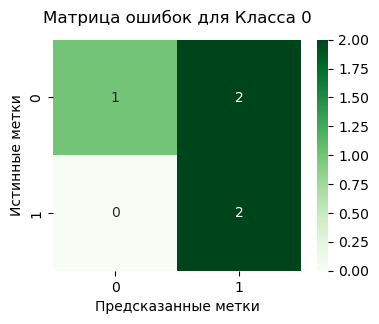

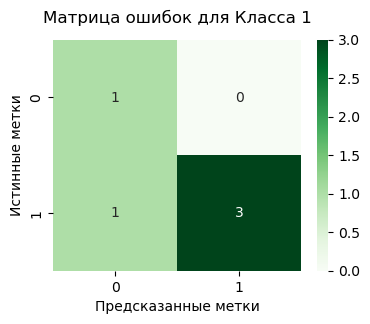

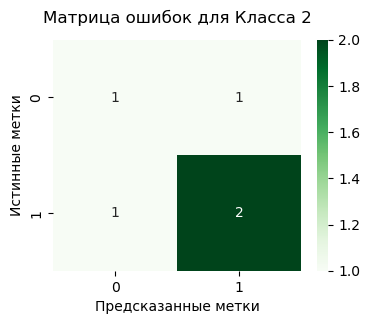

In [303]:
fruits = ['мандарин', 'апельсин', 'лимон']

for index, fruit in enumerate(fruits):
    print(index, fruit)

# Истинные метки классов
y_true = [[0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 1, 0], [1, 1, 1]]

# Предсказанные метки классов
y_pred = [[1, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0], [1, 1, 1]]

mcm = multilabel_confusion_matrix(y_true, y_pred)

for i, matrix in enumerate(mcm):
    plt.figure(figsize=(4, 3))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Greens')
    plt.title(f'Матрица ошибок для Класса {i}', pad=12)
    plt.xlabel('Предсказанные метки')
    plt.ylabel('Истинные метки')
    plt.show()

In [304]:
from sklearn.datasets import make_multilabel_classification

# Генерация данных
X, y = make_multilabel_classification(n_samples=300, n_classes=3, 
                                      n_labels=2, n_features=5, random_state=42)

# Преобразование признаков в DataFrame
X = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])

# Преобразование меток классов в DataFrame
y = pd.DataFrame(y, columns=[f'class_{i}' for i in range(y.shape[1])])

# Просмотр первых строк DataFrame
print('Признаки:', X.head(), sep='\n', end='\n\n') 
print('Целевая переменная:', y.head(), sep='\n',)

# Аргументы функции, использованные в примере:

# n_samples=300: Количество создаваемых объектов (образцов данных) = 300.
# n_classes=3: Количество классов, к которым могут относиться объекты, = 3.
# n_labels=2: Количество меток классов, которые могут быть присвоены каждому объекту = 2. Это означает, что каждый объект будет связан с двумя классами из трёх.
# n_features=5: Количество признаков (features), которые будут использоваться для описания каждого объекта = 5.
# random_state=42: Фиксирует генератор случайных чисел, чтобы каждый раз получать одни и те же данные при одинаковых параметрах (для воспроизводимости).

Признаки:
   feature_0  feature_1  feature_2  feature_3  feature_4
0        6.0       22.0        1.0        3.0        9.0
1        8.0        4.0       16.0       10.0        5.0
2        5.0       27.0       14.0        4.0       10.0
3        7.0       19.0       11.0       10.0       14.0
4        6.0       18.0       13.0        6.0       12.0

Целевая переменная:
   class_0  class_1  class_2
0        0        1        0
1        1        0        1
2        0        1        1
3        1        1        1
4        0        1        1


In [305]:
# Для демонстрации работы функции make_multilabel_classification() будем использовать модель случайного леса. 
# Создадим объект класса RandomForestClassifier(), предварительно разделив данные на обучающие и тестовые выборки. 
# Затем обучим модель и сделаем предсказания, 
# а далее при помощи функции multilabel_confusion_matrix()сформируем матрицу ошибок и выведем её на печать:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mcm = multilabel_confusion_matrix(y_test, y_pred)

print(mcm)

[[[41  8]
  [12 29]]

 [[30  9]
  [ 9 42]]

 [[35  5]
  [ 5 45]]]


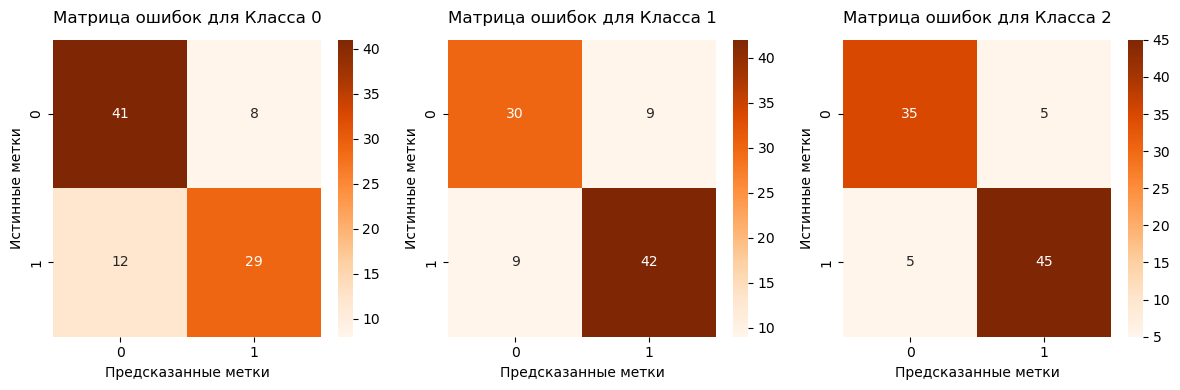

In [306]:
# И сделаем визуализацию этих данных, расположив матрицы горизонтально:

from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(12, 4))

gs = GridSpec(nrows=1, ncols=3, figure=fig)

for i, matrix in enumerate(mcm):
    ax = fig.add_subplot(gs[0, i])
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Oranges', ax=ax)
    ax.set_title(f'Матрица ошибок для Класса {i}', pad=12)
    ax.set_xlabel('Предсказанные метки')
    ax.set_ylabel('Истинные метки')
    
plt.tight_layout()
plt.show()

In [307]:
# Выборка y_test содержит 90 примеров, значит у нас сформировалось 90 матриц ошибок.
mcm = multilabel_confusion_matrix(y_test, y_pred, samplewise=True)
len(mcm)

90

In [308]:
# Допустим, нам нужно посмотреть на некоторые из них, например, с индексами 10, 11, 12 - выведем их на печать:

print(mcm[10:13])

[[[1 1]
  [0 1]]

 [[2 0]
  [0 1]]

 [[1 0]
  [0 2]]]


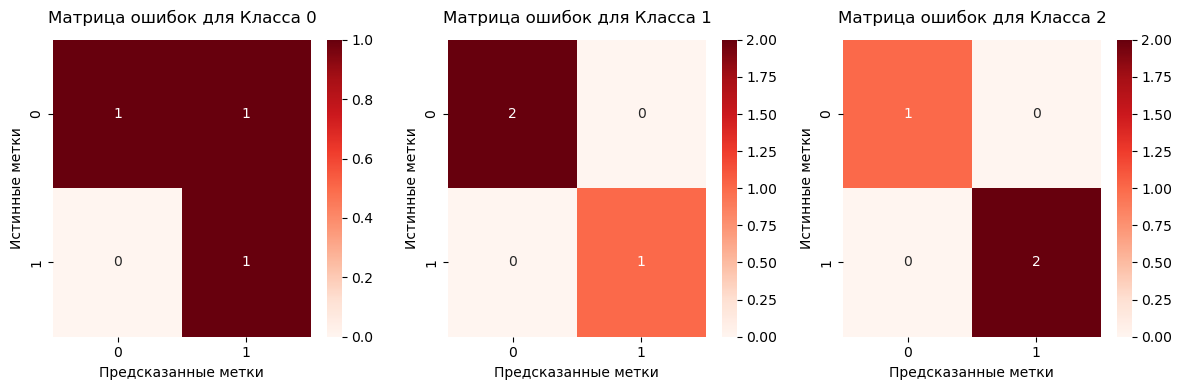

In [309]:
# И визуализируем эти матрицы:

fig = plt.figure(figsize=(12, 4))

gs = GridSpec(nrows=1, ncols=3, figure=fig)

for i, matrix in enumerate(mcm[10:13]):
    ax = fig.add_subplot(gs[0, i])
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Reds', ax=ax)
    ax.set_title(f'Матрица ошибок для Класса {i}', pad=12)
    ax.set_xlabel('Предсказанные метки')
    ax.set_ylabel('Истинные метки')
    
plt.tight_layout()
plt.show()

In [310]:
# Набор данных содержит четыре класса.  Выведите на печать матрицы ошибок только для третьего и четвёртого классов.

y_true = [[0, 0, 1, 0], [0, 1, 0, 0], [0, 1, 1, 1], [1, 1, 0, 0], [1, 1, 1, 1]]
y_pred = [[1, 0, 0, 0], [0, 1, 1, 0], [1, 0, 1, 1], [1, 1, 0, 1], [1, 1, 1, 0]]

print(multilabel_confusion_matrix(y_true, y_pred, samplewise=False)[2:5])
print()
print()
print(multilabel_confusion_matrix(y_true, y_pred, labels=[2,3]))

[[[1 1]
  [1 2]]

 [[2 1]
  [1 1]]]


[[[1 1]
  [1 2]]

 [[2 1]
  [1 1]]]


# 1.5 ConfusionMatrixDisplay

In [311]:
# Помимо библиотеки seaborn и её функцию heatmap() для наглядной визуализации матриц ошибок 
# в самой библиотеке scikit-learn имеется класс ConfusionMatrixDisplay, 
# который позволяет визуализировать матрицы ошибок. 
# Класс ConfusionMatrixDisplay использует инструменты библиотеки matplotlib для визуализации матриц ошибок.

# ConfusionMatrixDisplay(confusion_matrix, *, display_labels=None)

# confusion_matrix: Непосредственно сама матрица ошибок, которую необходимо визуализировать.
# display_labels: Метки для классов, которые будут отображаться на графике.

[[4 2]
 [1 3]]


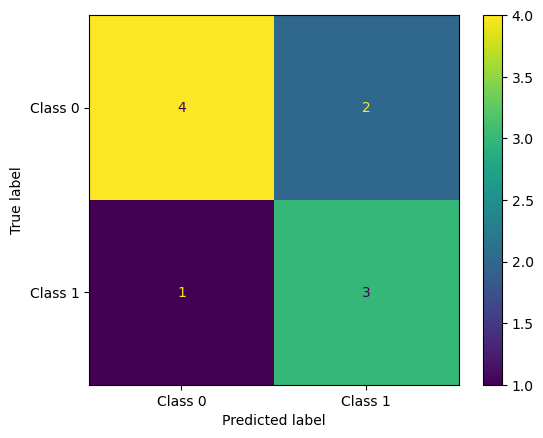

In [312]:
# Для того, чтобы произвелось графическое отображение матрицы ошибок, 
# нужно дополнительно использовать метод plot() класса ConfusionMatrixDisplay


from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Истинные метки классов
y_true = np.array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0])

# Предсказанные моделью метки
y_pred = np.array([0, 1, 1, 1, 0, 0, 0, 1, 1, 0])

cm = confusion_matrix(y_true, y_pred)
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot()

plt.show()

In [313]:
# Метод plot() 
# запускает отрисовку графика, фактически выводя матрицу ошибок на экран, 
# где каждая ячейка показывает количество предсказаний для комбинаций «истинное значение - предсказанное значение». 
# Метод plot() автоматически использует matplotlib для построения графика, 
# но сам метод принадлежит scikit-learn, 
# и именно scikit-learn вызывает отрисовку через встроенные инструменты matplotlib.

# plot(*, include_values=True, cmap='viridis', xticks_rotation='horizontal', values_format=None, 
#      ax=None, colorbar=True, im_kw=None, text_kw=None)

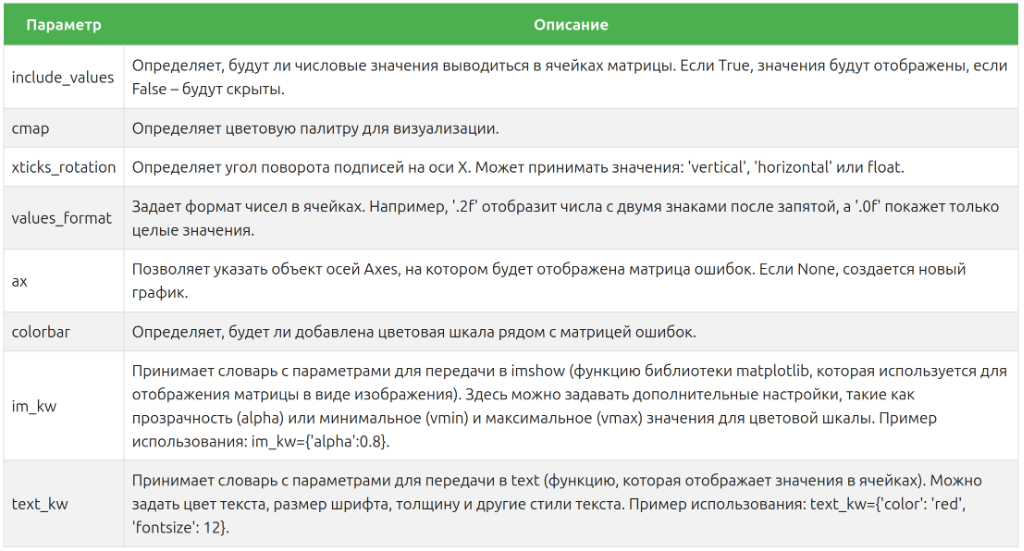

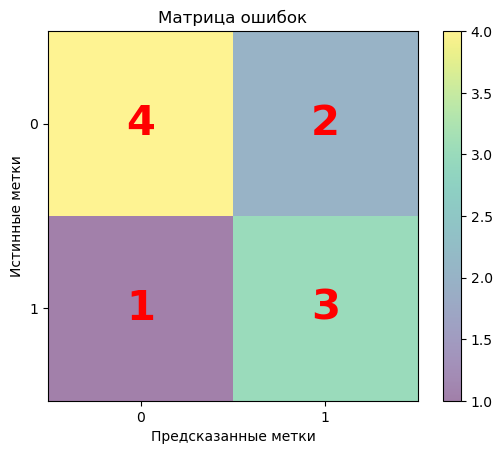

In [314]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

y_true = np.array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0])
y_pred = np.array([0, 1, 1, 1, 0, 0, 0, 1, 1, 0])

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(cm)
disp.plot(im_kw={'alpha': 0.5},
          text_kw={'color': 'red', 
                   'fontsize': 30, 
                   'fontweight': 'bold'})

plt.title('Матрица ошибок')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.show()

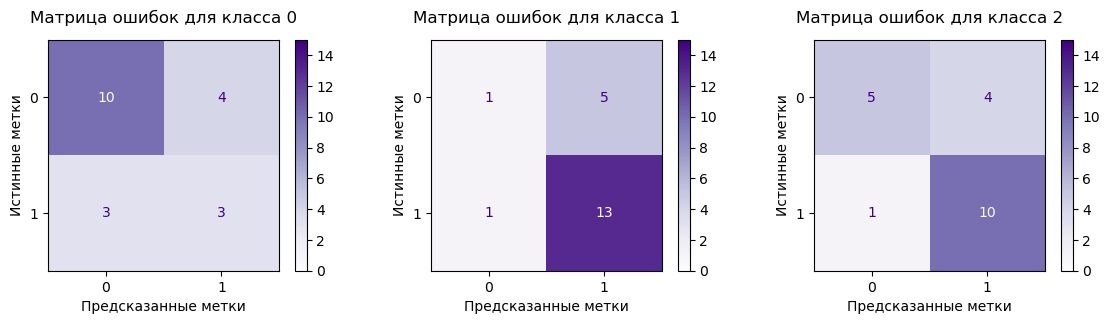

In [315]:
# Для многометочной классификации


# Генерация многометочных данных
X, y = make_multilabel_classification(n_samples=100, n_classes=3, n_labels=2, random_state=42)

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели случайного леса
model = RandomForestClassifier(random_state=42)

# Обучение модели
model.fit(X_train, y_train)

# Предсказания
y_pred = model.predict(X_test)

# Вычисление многометочной матрицы ошибок
mcm = multilabel_confusion_matrix(y_test, y_pred)

# Визуализация многометочной матрицы ошибок для каждой метки с горизонтальным отображением
fig = plt.figure(figsize=(14, 3))
gs = GridSpec(nrows=1, ncols=3, figure=fig)

for i, matrix in enumerate(mcm):
    ax = fig.add_subplot(gs[0, i])
    disp = ConfusionMatrixDisplay(confusion_matrix=mcm[i])
    disp.plot(cmap='Purples', im_kw={'vmin': 0, 'vmax': 15}, ax=ax)
    plt.title(f'Матрица ошибок для класса {i}', pad=12)
    plt.xlabel('Предсказанные метки')
    plt.ylabel('Истинные метки')

plt.show()

In [316]:
mcm

array([[[10,  4],
        [ 3,  3]],

       [[ 1,  5],
        [ 1, 13]],

       [[ 5,  4],
        [ 1, 10]]], dtype=int64)

# 1.6 precision_score()

In [317]:
# Одной из наиболее часто используемых метрик качества для задач классификации, является метрика precision (точность). 
# Метрика precision "работает" с предсказанными образцами положительного класса. 
# Если посмотреть на матрицу ошибок для бинарной классификации, 
# то для расчёта precision задействуются значения правой части матрицы: FP (False Positive) и TP (True Positive).

In [318]:
# Точность представляет собой долю правильно классифицированных положительных образцов среди всех предсказанных положительных. 
# В основе precision лежит стремление к снижению ложноположительных срабатываний, что особенно важно, когда ошибка может иметь последствия.

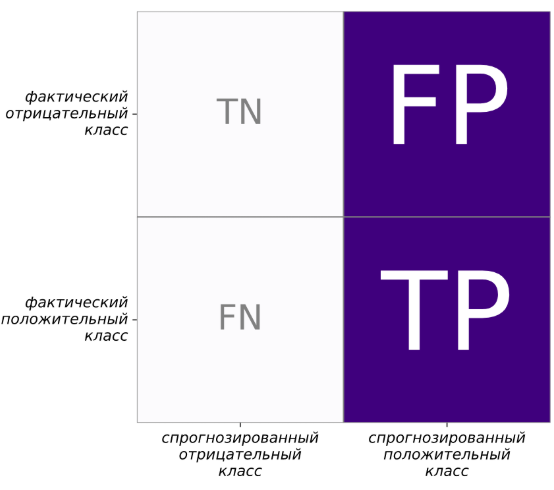

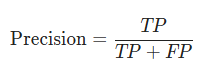

In [319]:
# где:

# TP (True Positive) – количество правильно классифицированных положительных образцов 
# (предсказан положительный класс, и фактически класс является положительным),
# FP (False Positive) – количество неправильно классифицированных положительных образцов 
# (предсказан положительный класс, но фактически класс является отрицательным).

In [320]:
# Несколько случаев, в которых важны высокие значения метрики precision:

# Оптимизация затрат и риска: 
# В задачах обнаружения мошенничества или кибербезопасности precision помогает не распылять ресурсы на ложные срабатывания. 
# Представьте, если каждая ложноположительная транзакция рассматривалась бы банком как мошенническая – 
# это привело бы к недовольству клиентов и значительным операционным издержкам.

# Фильтрация спама: 
# В фильтрах электронной почты важно, чтобы обычные письма не попадали в папку спама. 
# Precision помогает снизить количество «чистых» писем, ошибочно классифицированных как спам.

# Выявление дефектов на производстве: 
# При контроле качества в производственных процессах важно минимизировать ложные срабатывания, 
# чтобы снизить вероятность ошибочной маркировки качественного продукта как дефектного, 
# что может привести к излишним затратам и снижению эффективности.

# Рекомендательные системы в e-commerce: 
# Для точных рекомендаций товаров важно, чтобы рекомендации не приводили к раздражению пользователя из-за нерелевантных предложений. 
# Высокая точность (precision) помогает предложить только те товары, которые с наибольшей вероятностью интересуют пользователя.

# Обнаружение отказов в автомобилях: 
# В системах предупреждения о неисправностях в автомобилях ложные срабатывания 
# могут привести к лишним визитам в сервис и ухудшению восприятия пользователя. 
# Высокая точность помогает предупредить лишь о тех неисправностях, которые действительно требуют вмешательства.

# Выявление токсичных комментариев в соцсетях: 
# В системах модерации контента важно, чтобы алгоритм точно распознавал токсичные комментарии, чтобы не блокировать невинные высказывания. 
# Высокая точность позволяет снизить количество ложноположительных срабатываний и повысить качество автоматической модерации.

# Идентификация лояльных клиентов в CRM: 
# При выборе клиентов для специальных предложений важно, 
# чтобы выборка была точной и содержала только действительно заинтересованных клиентов. 
# Это помогает не переплачивать за маркетинговые акции, направленные на неподходящую аудиторию.

In [321]:
# precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None,
#                 zero_division='warn')

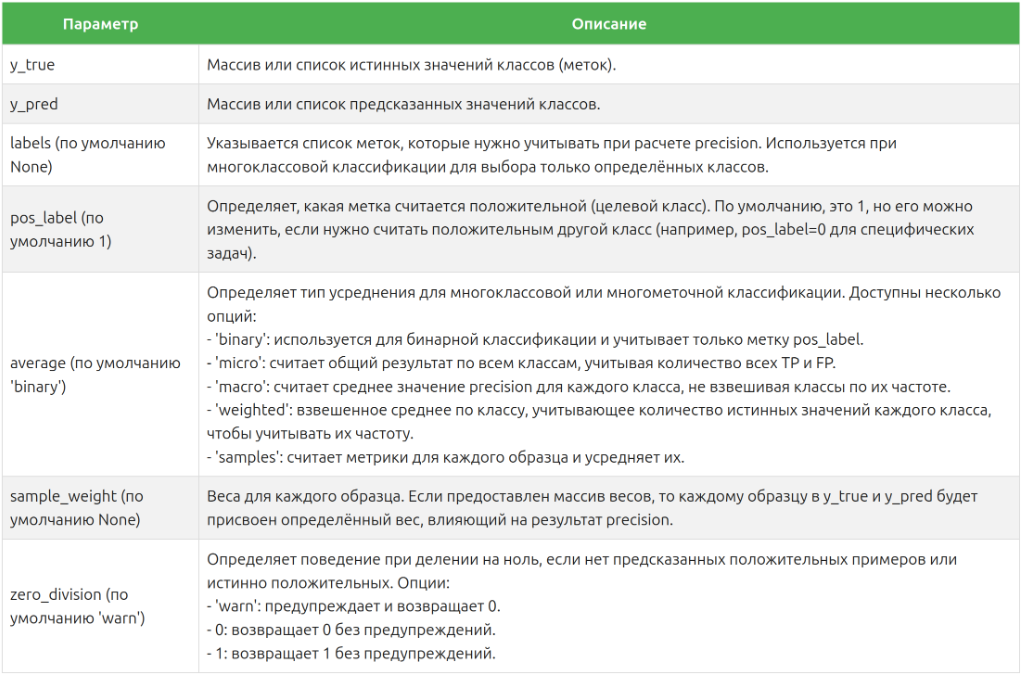

In [322]:
from sklearn.metrics import precision_score

# Истинные метки классов
y_true = [0, 1, 1, 0, 0, 0, 0, 1, 0]

# Предсказанные метки классов
y_pred = [0, 1, 1, 0, 0, 0, 1, 1, 0]

# Вычисление точности
precision = precision_score(y_true, y_pred)

print(f'Precision: {precision:.2f}')

Precision: 0.75


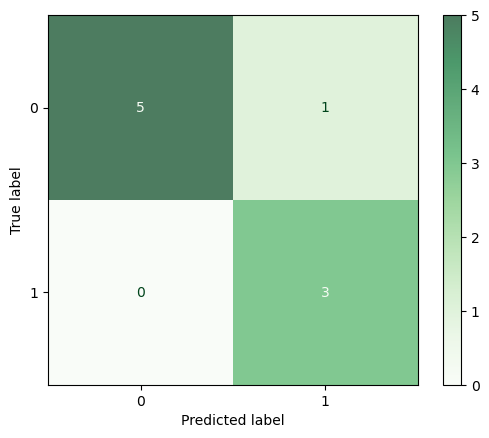

In [323]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='Greens', im_kw={'alpha': 0.7})

plt.show()

In [324]:
# Сымитируем задачу классификации мошеннических транзакций. Для этого создадим датасет с большой диспропорцией двух классов:

from sklearn.datasets import make_classification

# Создаем синтетический набор данных
# Здесь класс 1 будет представлять мошеннические транзакции
X, y = make_classification(
    n_samples=1000,       # количество транзакций
    n_features=20,        # количество признаков
    n_classes=2,          # два класса: мошенническая (1) и легитимная (0)
    weights=[0.95, 0.05], # несимметричное распределение (5% мошеннических)
    random_state=42)

In [325]:
# Разделим эти данные на обучающую и тестовую выборки. 
# После чего, обучим модель случайного леса и сделаем предсказания на тестовой выборке, 
# и вычислим метрики precision и accuracy:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Обучаем модель
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Делаем предсказания на тестовой выборке
y_pred = model.predict(X_test)

# Вычисляем precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

# Вычисляем accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Precision: 0.80
Accuracy: 0.97


In [326]:
# Данный пример позволяет наглядно увидеть, что если бы мы в оценке результата обучения модели опирались на метрику accuracy, 
# то данная модель нас вполне могла бы устроить, так как оценка, равная 0.97, является достаточно высокой. 
# Но метрика precision показывает нам, что точность модели 
# при определении положительного класса (мошеннических транзакций) составляет только 80%.

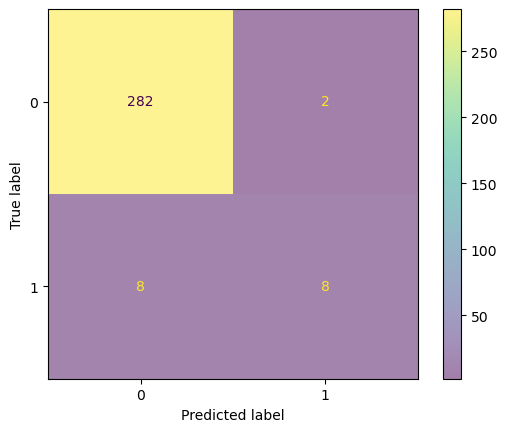

In [327]:
# Отобразим матрицу ошибок:

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(cm)
disp.plot(im_kw={'alpha': 0.5})

plt.show()

In [328]:
# Из 10-ти транзакций, которые модель посчитала противоправными, восемь – это мошеннические, 
# а две являются легитимными транзакциями, и отнесены к противозаконным ошибочно. 
# Соответственно, точность предсказаний модели равна 0.8.

In [329]:
# Параметр average функции precision_score()
# Параметр average функции precision_score() определяет, 
# как будут объединены метрики точности для многоклассовых и многометочных задач, 
# что позволяет гибко выбирать подход, наиболее подходящий для конкретного анализа.

# Его настройка особенно важна, если вы работаете с несимметричными задачами классификации, 
# где классы могут быть представлены в неравной пропорции или иметь разное значение для решения задачи.

## average='binary'

In [330]:
# average='binary'
# Применяется по умолчанию. 
# Используется для бинарной классификации и рассчитывает точность только для положительного класса (который помечен как 1). 
# В этом режиме precision_score() оценивает долю корректно классифицированных положительных объектов 
# относительно всех предсказанных положительных.

## average='micro'

In [331]:
# average='micro'
# Параметр average='micro' актуален, когда нужно вычислить точность по всем классам в задаче классификации с несколькими классами, 
# учитывая каждый экземпляр (True Positive и False Positive) одинаково, вне зависимости от класса. 
# Это полезно, когда требуется общий уровень точности, а не усредненная оценка по классам.

# Формула для расчета micro-average precision объединяет все истинные положительные (TP) 
# и ложные положительные (FP) предсказания по всем классам, чтобы получить общую точность.

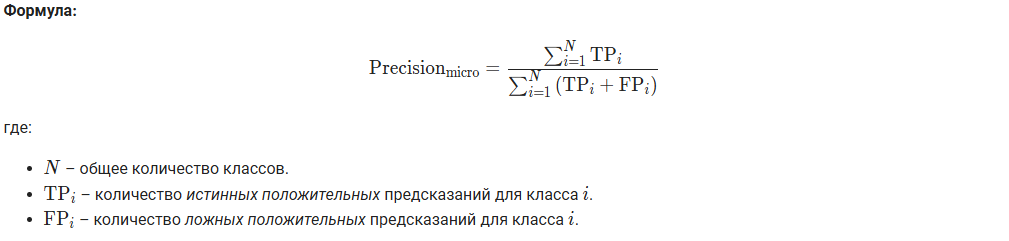

In [332]:
# Допустим, что у нас имеются два списка с истинными метками классов y_true и предсказанными метками классов y_pred:

y_true = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
          2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y_pred = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
          1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 
          2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
  
# Посмотрим на количество экземпляров в каждом классе в этих списках:

from collections import Counter

counts_true = Counter(y_true)
counts_pred = Counter(y_pred)

print('y_true:', counts_true)
print('y_pred:', counts_pred)

y_true: Counter({0: 45, 1: 30, 2: 30})
y_pred: Counter({0: 40, 2: 40, 1: 25})


In [333]:
# Рассчитаем метрику micro-average precision для этих данных:

from sklearn.metrics import precision_score

y_true = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
          2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y_pred = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
          1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 
          2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

# Вычисляем метрику точности (precision) для average='micro'
precision_micro = precision_score(y_true, y_pred, average='micro')

print(f'Micro-average Precision: {precision_micro:.3f}')

Micro-average Precision: 0.714


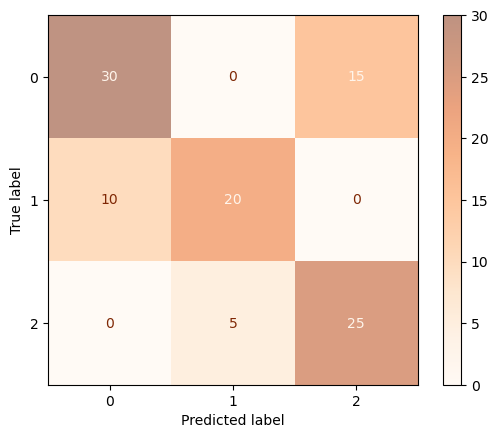

In [334]:
# Теперь давайте рассчитаем эту метрику вручную, используя приведённую выше формулу. 
# Сначала отобразим матрицу ошибок:

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='Oranges', im_kw={'alpha': 0.5})

plt.show()

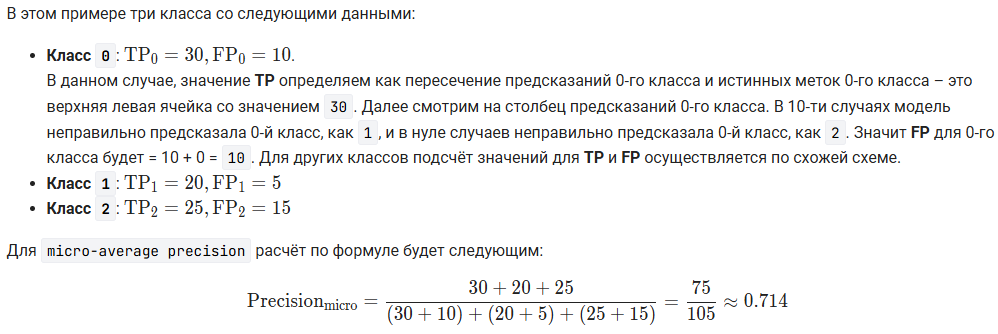

In [335]:
# Итак, параметр average='micro' считает precision для каждого истинного и ложного прогноза, 
# независимо от класса, что даёт общее представление о точности модели по всем категориям сразу.
 
# Это может быть актуально, если одна категория доминирует, и точность в целом важнее, чем для каждого класса отдельно.

## average='macro'

In [336]:
# average='macro'
# В формуле для расчета macro-average precision, для каждого класса рассчитывается его точность, 
# а затем все эти значения усредняются. 

# Macro-average не учитывает количество экземпляров в каждом классе, что позволяет избежать искажений, 
# связанных с доминированием классов с большим количеством примеров.

#  Этот подход важен, когда классы представлены неравномерно, так как он не зависит от их распределения, 
# делая акцент на равномерной важности каждого класса.

# Пример: Если модель классифицирует разные типы заболеваний, average='macro' покажет, 
# насколько точно модель предсказывает каждую болезнь, независимо от того, насколько редко или часто она встречается.

In [337]:
# Вычисляем метрику точности (precision) для average='macro'
precision_macro = precision_score(y_true, y_pred, average='macro')

print(f'Macro-average Precision: {precision_macro}')

Macro-average Precision: 0.725


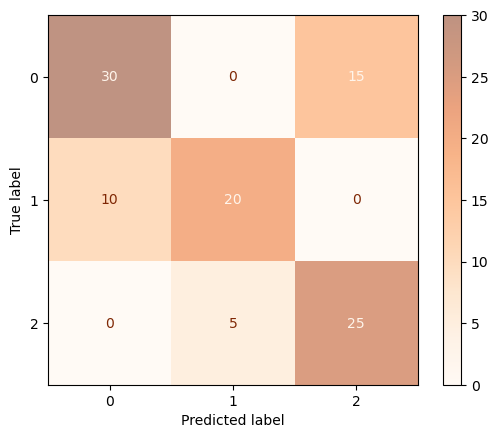

In [338]:
disp.plot(cmap='Oranges', im_kw={'alpha': 0.5})

plt.show()

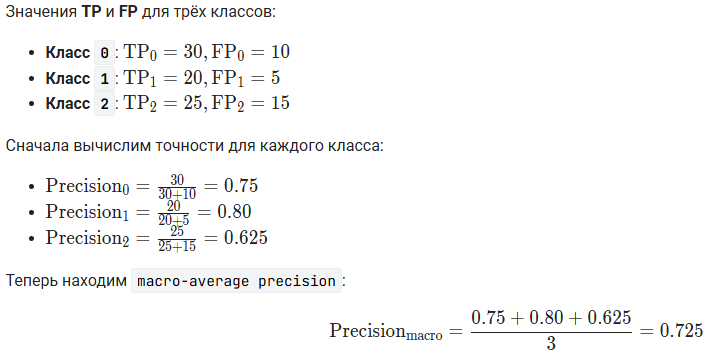

In [339]:
# Итак, macro-average precision позволяет оценить общую производительность модели, уделяя равное внимание каждому классу. 
# Это может быть важно для обеспечения того, чтобы модель хорошо работала для всех классов, независимо от их частоты в наборе данных.

## average='weighted'

In [340]:
# average='weighted'
# Параметр average='weighted' функции precision_score() усредняет метрики каждого класса с учетом их пропорции (или веса) в тестовой выборке.

# Формула для расчета weighted-average precision учитывает количество экземпляров в каждом классе 
# и позволяет получать более сбалансированную оценку, особенно в задачах с несбалансированными классами.

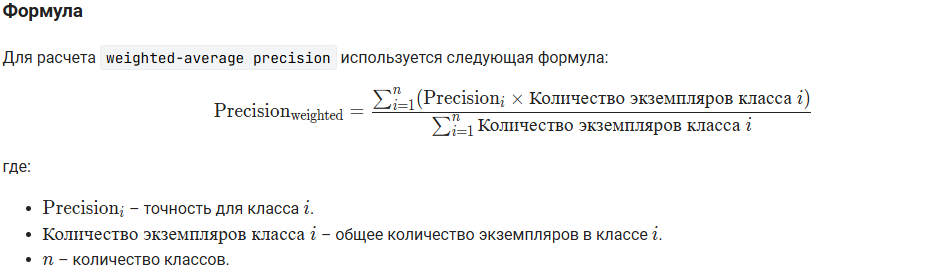

In [341]:
# Вычисляем метрику точности (precision) для average='weighted'
precision_weighted = precision_score(y_true, y_pred, average='weighted')

print(f'Weighted-average Precision: {precision_weighted:.3f}')

Weighted-average Precision: 0.729


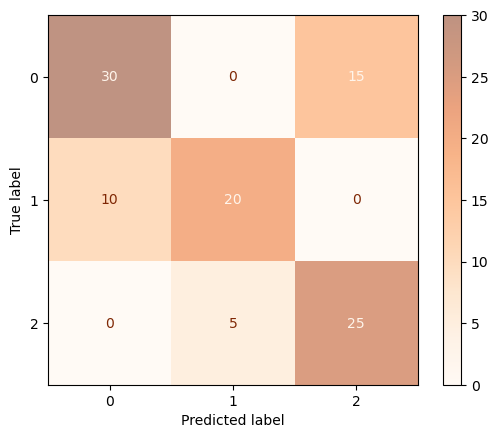

In [342]:
disp.plot(cmap='Oranges', im_kw={'alpha': 0.5})

plt.show()

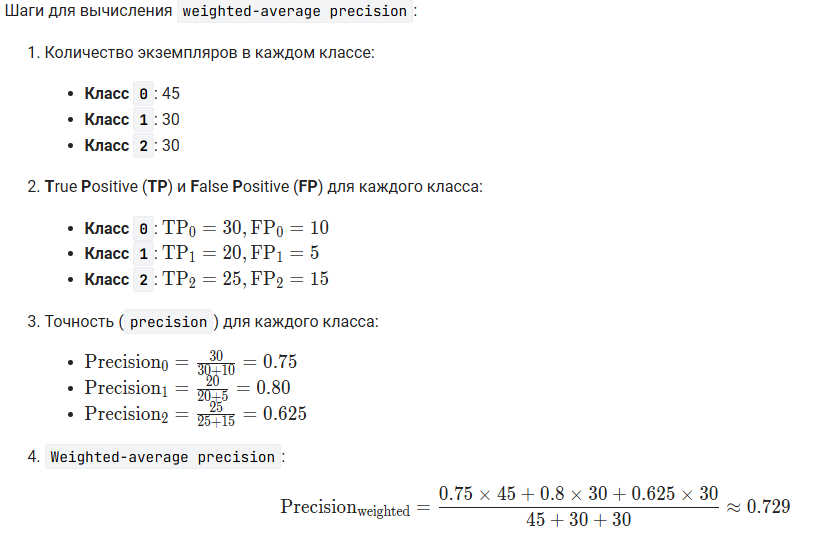

In [343]:
# Интерпретация метрики weighted-average precision:

# Если weighted-average precision высокое, это означает, 
# что модель хорошо предсказывает наиболее распространенные классы, так как их точность имеет наибольший вес.

# Если значение weighted-average precision низкое, 
# то модель не справляется с точными предсказаниями для крупных классов, что может быть критично, 
# если доминирующие классы имеют высокий практический интерес.

# Таким образом, weighted-average precision полезен, когда приоритет отдается более крупным классам, 
# а не редким, и важно, чтобы точность по основным классам была максимальной.

## average='samples'

In [344]:
# average='samples'
# Подходит для многометочной классификации, в которой каждому образцу может быть назначено несколько меток. 
# В этом случае точность рассчитывается для каждого образца, а затем усредняется по всем образцам. 

# Такой подход важен для задач, где одно наблюдение может принадлежать сразу нескольким классам, 
# например, как в классификации текстов по нескольким тематикам.

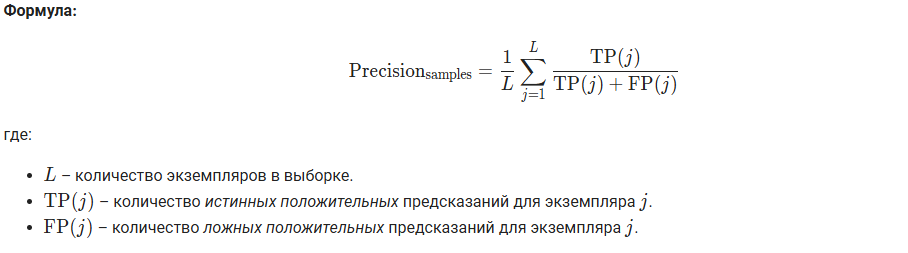

In [345]:
# Например, у нас имеются следующие два массива с истинными и предсказанными метками:

import numpy as np

y_true = np.array([[1, 0, 1],  # Образец 1 принадлежит к классам 0 и 2
                   [0, 1, 0],  # Образец 2 принадлежит к классу 1
                   [1, 1, 0],  # Образец 3 принадлежит к классам 0 и 1
                   [0, 0, 1]]) # Образец 4 принадлежит к классу 2

y_pred = np.array([[1, 0, 0],  # Образец 1 предсказан с классом 0
                   [0, 1, 0],  # Образец 2 предсказан с классом 1
                   [1, 0, 1],  # Образец 3 предсказан с классами 0 и 2
                   [0, 0, 1]]) # Образец 4 предсказан с классом 2

In [346]:
# При помощи функции precision_score() с параметром average='samples' рассчитаем точность:

from sklearn.metrics import precision_score

precision_samples = precision_score(y_true, y_pred, average='samples')

print(f'Samples-average Precision: {precision_samples:.3f}')

Samples-average Precision: 0.875


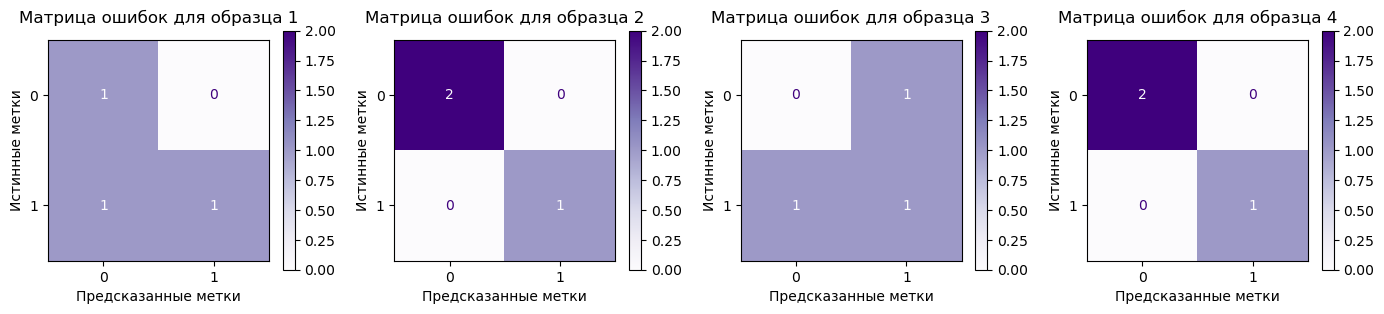

In [347]:
# Давайте также вручную рассчитаем точность. 
# Сначала отобразим матрицу ошибок для каждого образца:

from matplotlib.gridspec import GridSpec
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt

# Вычисление многометочной матрицы ошибок
mcm = multilabel_confusion_matrix(y_true, y_pred, samplewise=True)

# Визуализация многометочной матрицы ошибок для каждого образца с горизонтальным отображением
fig = plt.figure(figsize=(14, 3))
gs = GridSpec(nrows=1, ncols=len(mcm), figure=fig)

for i, matrix in enumerate(mcm):
    ax = fig.add_subplot(gs[0, i])
    disp = ConfusionMatrixDisplay(confusion_matrix=mcm[i])
    disp.plot(cmap='Purples', im_kw={'vmin': 0, 'vmax': 2}, ax=ax)
    plt.title(f'Матрица ошибок для образца {i+1}', pad=12)
    plt.xlabel('Предсказанные метки')
    plt.ylabel('Истинные метки')

plt.tight_layout()
plt.show()

In [348]:
# В данном случае сформирована матрица по каждому образцу, но без разбивки на классы, 
# то есть в каждой матрице ошибки и совпадения показаны совокупно по всем классам.

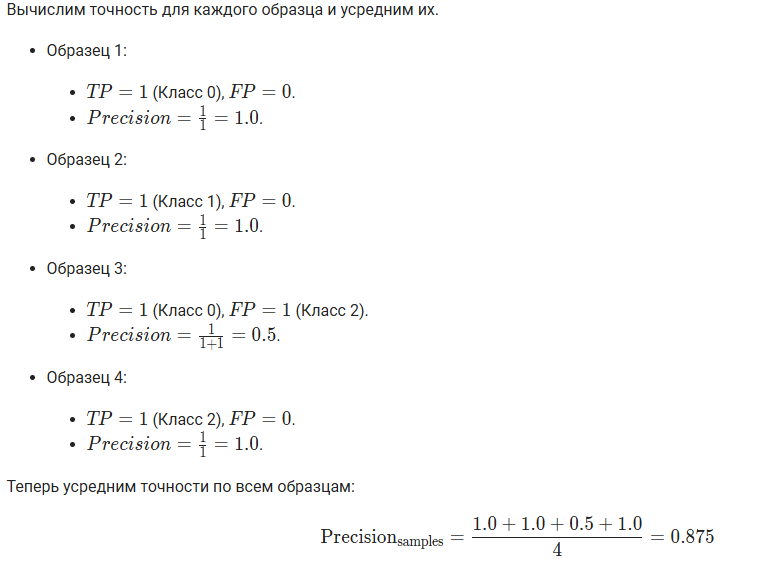

## Задачи

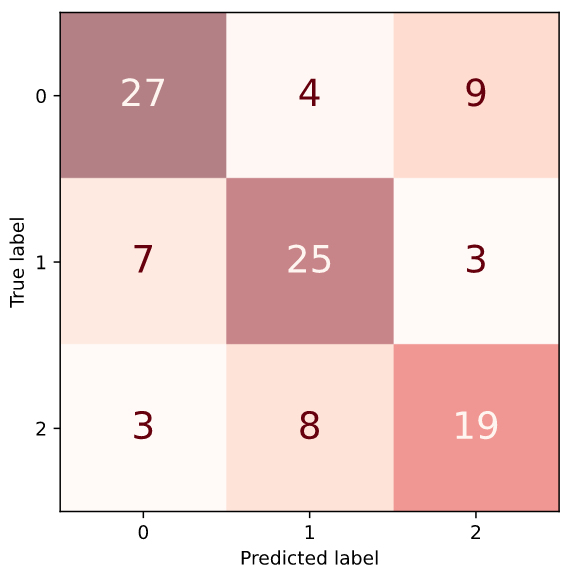

In [349]:
micro = (27 + 25 + 19) / (37 + 37 + 31)
macro = (27 / 37 + 25 / 37 + 19 / 31) / 3
weighted = ((27 / 37) * 40 + (25 / 37) * 35 + (19 / 31) * 30) / (40 + 35 + 30)

print(f'micro: {micro:.3f}')
print(f'macro: {macro:.3f}')
print(f'weighted: {weighted:.3f}')

micro: 0.676
macro: 0.673
weighted: 0.678


In [350]:
# Даны два списка:

# y_true – фактические метки;
# y_pred – предсказанные метки.

# Рассчитайте метрики accuracy и precision

import numpy as np

y_true = [1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0]   
y_pred = [1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0]   

y_true = np.array(y_true)
y_pred = np.array(y_pred)

accuracy = np.sum(y_true == y_pred) / len(y_true)
precision = np.sum(y_true[np.where(y_pred == 1)] == y_pred[np.where(y_pred == 1)]) / \
            np.sum(y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')

Accuracy: 0.79
Precision: 0.75


In [351]:
# Даны два списка:

# y_true – фактические метки;
# y_pred – предсказанные метки.
# Класс 3 является положительным классом.

# Рассчитайте точность (precision).

y_true = [3, 3, 2, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3]   
y_pred = [2, 3, 3, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 2, 3]   

precision = precision_score(y_true, y_pred, pos_label=3)

print(f'Precision: {precision:.3f}')

Precision: 0.857


In [352]:
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X, y = make_classification(n_samples=2000,                 # количество примеров
                           n_features=10,                  # количество признаков
                           n_classes=4,                    # количество классов
                           n_informative=4,                # количество информативных признаков 
                           weights=[0.7, 0.15, 0.1, 0.05], # веса классов
                           random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_weighted = precision_score(y_test, y_pred, average='weighted')

print(cm, end='\n\n')
print(f'Micro-average Precision: {precision_micro:.3f}')
print(f'Macro-average Precision: {precision_macro:.3f}')
print(f'Weighted-average Precision: {precision_weighted:.3f}')

[[234  20  17   7]
 [ 20  35   4   2]
 [ 14   1  23   3]
 [  4   5   3   8]]

Micro-average Precision: 0.750
Macro-average Precision: 0.581
Weighted-average Precision: 0.756


In [353]:
from sklearn.datasets import make_multilabel_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
# добавьте необходимые импорты
from sklearn.metrics import multilabel_confusion_matrix, precision_score

num_1, num_2, num_3, num_4 = map(int, '500 3 2 42'.split())
X, y = make_multilabel_classification(n_samples=num_1, # количество примеров
                                      n_classes=num_2, # количество классов
                                      n_labels=num_3,  # Среднее количество меток (классов), которые  
                                                       # присваиваются каждому наблюдению.
                                      random_state=num_4)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
# Продолжите написание кода здесь

mcm = multilabel_confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='samples', zero_division=0)

print(mcm)
print()
print('%.3f' % precision)

[[[69 27]
  [21 33]]

 [[40 21]
  [20 69]]

 [[39 24]
  [17 70]]]

0.617


In [354]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

num_1, num_2, num_3, num_4, num_5, num_6, num_7, num_8 = map(int, '2000 10 3 4 7 2 1 42'.split())
X, y = make_classification(n_samples=num_1,                        # количество примеров
                           n_features=num_2,                       # количество признаков
                           n_classes=num_3,                        # количество классов
                           n_informative=num_4,                    # количество информативных признаков 
                           weights=[num_5/10, num_6/10, num_7/10], # веса классов
                           random_state=num_8)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Дерево решений
model_dtc = DecisionTreeClassifier(random_state=42)
model_dtc.fit(X_train, y_train)
y_pred_dtc = model_dtc.predict(X_valid)

# Случайный лес
model_rfc = RandomForestClassifier(random_state=42)
model_rfc.fit(X_train, y_train)
y_pred_rfc = model_rfc.predict(X_valid)

# Наивный байес с распределением Гаусса
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)
y_pred_gnb = model_gnb.predict(X_valid)

precision_weighted_dtc = precision_score(y_valid, y_pred_dtc, average='weighted')
precision_weighted_rfc = precision_score(y_valid, y_pred_rfc, average='weighted')
precision_weighted_gnb = precision_score(y_valid, y_pred_gnb, average='weighted')

print(f'WA Precision для DecisionTreeClassifier: {precision_weighted_dtc:.3f}')
print(f'WA Precision для RandomForestClassifier: {precision_weighted_rfc:.3f}')
print(f'WA Precision для GaussianNB: {precision_weighted_gnb:.3f}', end='\n\n')
print()

y_pred = model_rfc.predict(X_test)
precision_best_estimator = precision_score(y_test, y_pred, average='weighted')

print('%.3f' % precision_best_estimator)

WA Precision для DecisionTreeClassifier: 0.802
WA Precision для RandomForestClassifier: 0.865
WA Precision для GaussianNB: 0.780


0.814


# recall_score()

In [355]:
# Функция recall_score() библиотеки scikit-learn – это один из ключевых инструментов для оценки качества модели классификации, 
# особенно в тех задачах, где важна полнота (recall).

# Полнота измеряет, какую долю всех реальных положительных примеров модель правильно предсказала. 
# В тех ситуациях, где важно минимизировать количество пропущенных положительных случаев, 
# полнота становится решающим критерием качества модели.

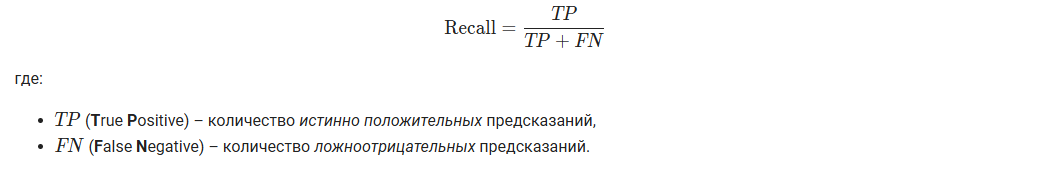

In [356]:
# Полнота (recall) используется, когда критично минимизировать ложноотрицательные результаты, 
# то есть ситуации, когда модель не замечает важные положительные примеры.
 
# В задачах, связанных с безопасностью, здоровьем или финансовыми рисками, 
# пропуски положительных случаев могут иметь серьёзные последствия, 
# поэтому recall становится приоритетной метрикой.

# Случаеи, в которых важны высокие значения метрики recall:

# Диагностика серьезных заболеваний (онкология, инфекционные заболевания): 
# Важно выявить все положительные случаи, даже если некоторые из них окажутся ложными срабатываниями, 
# чтобы не пропустить тех, кто действительно болен.

# Мониторинг состояния авиационного оборудования и прогнозирование отказов: 
# В авиации важно предсказывать все возможные отказы оборудования, 
# поскольку даже один пропущенный инцидент может стоить человеческих жизней.

# Контроль качества и обнаружение загрязнений в пищевой промышленности: 
# В процессе производства продуктов питания обнаружение загрязнений (например, металла, стекла, вредных примесей) 
# требует высокой полноты, поскольку пропуск загрязнения может привести к ухудшению здоровья потребителей и отзыву продукции.

# Кредитный скоринг: 
# При выдаче кредитов для определения потенциально дефолтных заемщиков 
# система с высоким recall может лучше защитить банк от неплатежей.

# Распознавание дорожных знаков и разметки: 
# Важно распознать все знаки и разметку на дороге, чтобы автомобиль "на автопилоте" 
# корректно следовал правилам движения и не создавал опасных ситуаций.

# Распознавание потенциально опасных действий в общественных местах: 
# Системы должны фиксировать и определять любое подозрительное поведение (драки, падения и т.д.), 
# чтобы сотрудники охраны могли вовремя среагировать.

# Обнаружение сорняков и вредителей: 
# В сельском хозяйстве дроны с камерами могут обнаруживать участки, пораженные вредителями или сорняками. 
# Важно выявить все пораженные зоны, чтобы оперативно принять меры по обработке.

# Анализ негативных отзывов: 
# При анализе отзывов о компании или продукте важно захватить все тексты с негативной тональностью. 
# Пропущенные негативные отзывы могут исказить оценку настроений клиентов и привести к неверным бизнес-решениям.

In [357]:
# Синтаксис функции recall_score():

# recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, 
#              zero_division='warn')

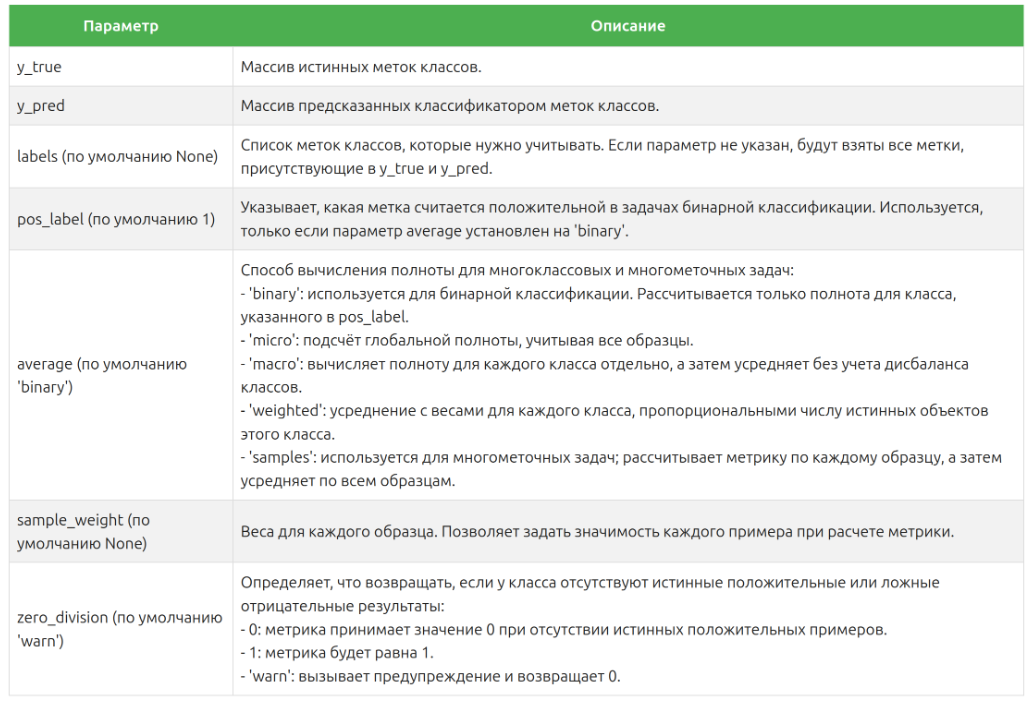

In [358]:
# Теперь рассчитаем метрику recall на простом примере:

from sklearn.metrics import recall_score

# Истинные метки классов
y_true = [0, 1, 1, 0, 0, 0, 0, 1, 0]

# Предсказанные метки классов
y_pred = [0, 1, 1, 0, 0, 0, 1, 1, 0]

# Вычисление полноты
recall = recall_score(y_true, y_pred)

print(f'Recall: {recall:.2f}')

Recall: 1.00


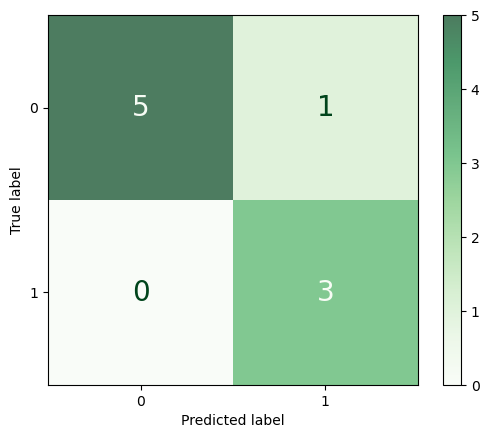

In [359]:
# Полнота для этих данных равна 1. 
# Давайте рассчитаем полноту вручную по формуле, приведённой выше, и сверимся с результатом, 
# предоставленным функцией recall_score(). 
# Сначала отобразим матрицу ошибок:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='Greens', im_kw={'alpha': 0.7}, text_kw={'fontsize': 20})

plt.show()

In [360]:
# Рассчитаем полноту по формуле: 3 / (3 + 0) = 1. И получаем такой же результат, как и рассчитанный функцией recall_score()

In [361]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

# Создаем синтетический набор данных
# Здесь класс 1 будет представлять мошеннические транзакции
X, y = make_classification(
    n_samples=1000,       # количество транзакций
    n_features=20,        # количество признаков
    n_classes=2,          # два класса: мошенническая (1) и легитимная (0)
    weights=[0.95, 0.05], # несимметричное распределение (5% мошеннических)
    random_state=42)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Обучаем модель
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Делаем предсказания на тестовой выборке
y_pred = model.predict(X_test)

# Вычисляем recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

# Вычисляем precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

# Вычисляем accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Recall: 0.50
Precision: 0.80
Accuracy: 0.97


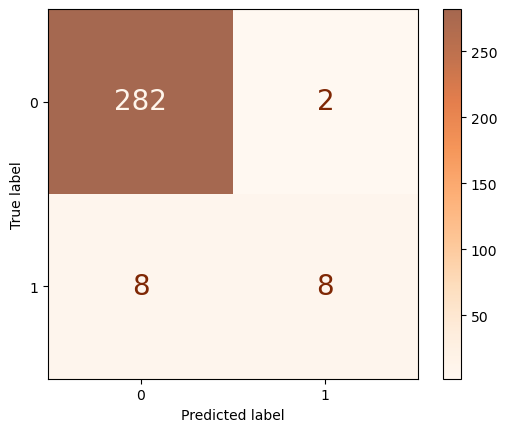

In [362]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='Oranges', im_kw={'alpha': 0.7}, text_kw={'fontsize': 20})

plt.show()

In [363]:
# Полученный результат наглядно демонстрирует слабые стороны метрики accuracy, 
# да и вообще, показывает важность правильного выбора именно той метрики, 
# которая наиболее соответствует целям поставленной задачи. 

# Представьте, что если бы мы в задаче по классификации мошеннических транзакций, 
# выбрали как ориентир - правильность accuracy, то ввели бы в эксплуатацию "кривую" модель. 
# На "бумаге" у нас было бы всё отлично - мы имеем высокую правильность, аж 97%. 
# Но на деле, наша модель пропускает 50% противоправных транзакций, 
# а 20% транзакций из тех, которые она считает мошенническими, являются ошибочно классифицированными. 
# В данном случае нужно работать над повышением и полноты (recall), и точности (precision).

# Однако одновременно повышать и полноту, и точность удаётся лишь до определённого предела, 
# так как они часто вступают в противоречие друг с другом. 
# Увеличивая полноту, мы можем жертвовать точностью или наоборот.

## Порог классификации

In [364]:
# Порог классификации – это ключ к управлению тем, как модель машинного обучения принимает решения. 
# Величина порога (threshold) определяет, начиная с какого значения вероятности, 
# модель будет считать объект принадлежащим к определённому классу.

In [365]:
# Далее нам понадобиться метод predict_proba() библиотеки scikit-learn, 
# который возвращает вероятности принадлежности каждого экземпляра к определённому классу в задаче классификации.

# Этот метод возвращает массив, где каждая строка соответствует экземпляру, 
# а каждый столбец – вероятностям принадлежности к соответствующему классу. 
# Для бинарной классификации массив будет иметь два столбца, 
# где первый столбец представляет вероятность принадлежности к классу 0, а второй – к классу 1. 
# Сумма вероятностей по каждому экземпляру всегда равна 1. 
# Это означает, что если proba[i] – это вероятность для экземпляра i, то proba[i][0] + proba[i][1] = 1.

# Давайте к данным предыдущего примера применим метод predict_proba() и выведем на печать первые 10 экземпляров:

y_proba = model.predict_proba(X_test)

print(y_proba[:10])

[[0.95 0.05]
 [0.99 0.01]
 [1.   0.  ]
 [1.   0.  ]
 [0.93 0.07]
 [0.96 0.04]
 [1.   0.  ]
 [1.   0.  ]
 [0.99 0.01]
 [1.   0.  ]]


In [366]:
# Для первого экземпляра вероятность принадлежности к классу 0 составляет 0.95, а к классу 1 – 0.05. 
# Для второго экземпляра вероятность принадлежности к классу 0 составляет 0.99, а к классу 1 – 0.01 и т.д.

# Далее, оставим только те предсказания, которые относятся к положительному классу, т.е. к классу 1:

y_proba = model.predict_proba(X_test)[:, 1]

print(y_proba[:10])

[0.05 0.01 0.   0.   0.07 0.04 0.   0.   0.01 0.  ]


In [367]:
# Теперь снизим порог классификации до 0.1, т.е., если вероятность выше этого порога или равна ему, 
# то образец будем относить к положительному классу 1. 
# Снижая порог, мы снижаем требования к отнесению образцов к положительному классу.

threshold_01 = 0.1

y_pred_th01 = y_proba >= threshold_01

print(y_pred_th01[0:10])

[False False False False False False False False False False]


In [368]:
# Если к этому массиву применить метод astype() и перевести булевы значения в целочисленные, 
# то значения True трансформируются в единицы, а False – в нули:

y_pred_custom_01 = (y_proba >= threshold_01).astype(int)

print(y_pred_custom_01)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0]


In [369]:
# В итоге мы получаем массив с предсказанными моделью целевыми значениями при пороге классификации = 0.1.

# А теперь посчитаем точность и полноту при пороге классификации = 0.1:

precision_01 = precision_score(y_test, y_pred_custom_01)
recall_01 = recall_score(y_test, y_pred_custom_01)

print(f'Precision при пороге = 0.1:   {precision_01:.2f}')
print(f'Recall при пороге = 0.1:      {recall_01:.2f}')

Precision при пороге = 0.1:   0.31
Recall при пороге = 0.1:      0.69


In [370]:
# Далее давайте проделаем то же самое, но для порога классификации 0.7, т.е. ужесточим требования к отнесению образцов к положительному классу.

threshold_07 = 0.7

y_pred_custom_07 = (y_proba >= threshold_07).astype(int)

print(y_pred_custom_07)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


In [371]:
# Рассчитаем точность и полноту при пороге классификации = 0.7:

precision_07 = precision_score(y_test, y_pred_custom_07)
recall_07 = recall_score(y_test, y_pred_custom_07)

print(f'Precision при пороге = 0.7:   {precision_07:.2f}')
print(f'Recall при пороге = 0.7:      {recall_07:.2f}')

Precision при пороге = 0.7:   1.00
Recall при пороге = 0.7:      0.19


In [372]:
print(f'Precision при пороге = 0.1:   {precision_01:.2f}')
print(f'Precision при пороге = 0.5:   {precision:.2f}')
print(f'Precision при пороге = 0.7:   {precision_07:.2f}', end='\n\n')

print(f'Recall при пороге = 0.1:      {recall_01:.2f}')
print(f'Recall при пороге = 0.5:      {recall:.2f}')
print(f'Recall при пороге = 0.7:      {recall_07:.2f}')

Precision при пороге = 0.1:   0.31
Precision при пороге = 0.5:   0.80
Precision при пороге = 0.7:   1.00

Recall при пороге = 0.1:      0.69
Recall при пороге = 0.5:      0.50
Recall при пороге = 0.7:      0.19


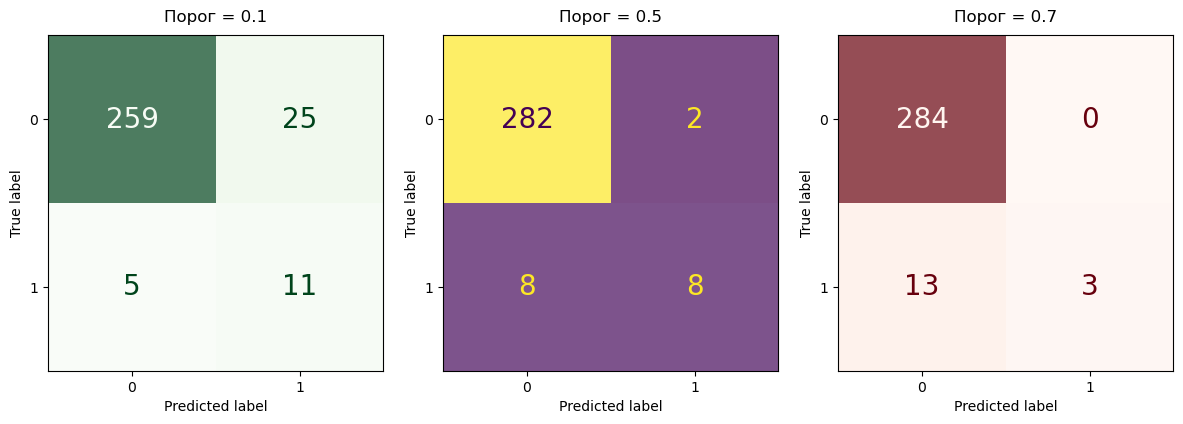

In [373]:
# Нарисуем матрицы ошибок для данного примера, 
# предварительно создав пользовательскую функцию для снижения объёма дублируемого кода:

from matplotlib.gridspec import GridSpec
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


def draw_confusion_matrix(y_true, y_pred, ax, cmap='Greens', threshold=0.5):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(cmap=cmap, 
              im_kw={'alpha': 0.7},
              text_kw={'fontsize': 20},
              ax=ax, 
              colorbar=False)
    plt.title(f'Порог = {threshold}', pad=10)


fig = plt.figure(figsize=(12, 4))
gs = GridSpec(nrows=1, ncols=3, figure=fig)

ax1 = fig.add_subplot(gs[0,0])
draw_confusion_matrix(y_test, y_pred_custom_01, ax1, cmap='Greens', threshold=0.1)

ax2 = fig.add_subplot(gs[0,1])
draw_confusion_matrix(y_test, y_pred, ax2, cmap='viridis')

ax3 = fig.add_subplot(gs[0,2])
draw_confusion_matrix(y_test, y_pred_custom_07, ax3, cmap='Reds', threshold=0.7)

plt.tight_layout()
plt.show()

In [374]:
# Начнём с первой матрицы ошибок, показывающей "положение дел" при пороге, равном 0.1. 
# В данном случае мы настолько сильно снизили порог вероятности отнесения образцов к положительному классу (1), 
# что стали много примеров отрицательного класса (0) классифицировать как положительный класс (1). 
# От этого стало расти число ложноположительных примеров (FP = 25). 
# Так как FP находится в знаменателе формулы вычисления точности (precision), то происходит снижение этой метрики.
 
# Но в то же время, модель всё больше и больше начинает правильно предсказывать положительный класс. 
# Значение True Positive (TP = 11) самое высокое именно на первой матрице ошибок.

# Также снижается количество ложноотрицательных примеров (FN = 5), 
# а, следовательно, увеличивается полнота (recall), 
# так как показатель FN находится в знаменателе формулы расчёта метрики recall.

# Если эту задачу считать задачей определения мошеннических транзакций, 
# то при снижении порога классификации мы всё больше и больше правильно выявляем противоправные операции. 
# Но в то же время мы совершаем много ошибок, классифицируя легальные транзакции как мошеннические.

In [375]:
# Теперь обратим внимание на третью матрицу, сформированную при пороге, равном 0.7. 
# В этом случае мы достаточно высоко подняли порог вероятности для выявления положительного класса (1), 
# и как бы перестраховываемся, когда предсказываем этот класс. 
# Следовательно, мы много примеров положительного класса (1) классифицируем, как отрицательный класс (0), 
# поэтому растёт показатель False Negative (FN = 13), что, в свою очередь, снижает метрику recall.

# Но зато, модель начинает меньше ошибаться в предсказаниях отрицательного класса (0), 
# из-за чего снижается показатель False Positive (FP = 0 в нашем случае), 
# что, соответственно, отражается на росте точности (precision).

# Применительно к задаче определения мошеннических транзакций, 
# при увеличении порога классификации модель всё меньше и меньше ошибается в определении легальных операций, 
# но слабо классифицирует незаконные транзакции.

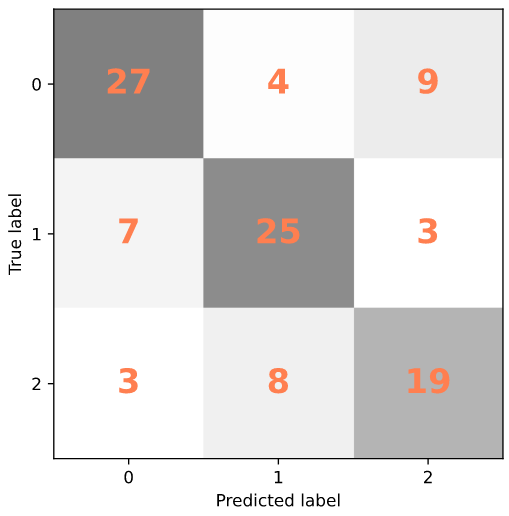

## Задачи

In [376]:
# Рассчитайте:

# Метрику recall macro для всех классов.
# Метрику recall macro только для классов 0 и 1.

y_true = [0, 1, 2, 1, 0, 2, 1, 0, 2, 0, 1, 1, 0, 0, 1, 1, 0, 1]   
y_pred = [1, 0, 2, 1, 0, 2, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0]

recall_macro = recall_score(y_true, y_pred, average='macro')
recall_macro_0_1 = recall_score(y_true, y_pred, average='macro', labels=[0, 1])

print(f'Macro-average Recall: {recall_macro:.4f}')
print(f'Macro-average Recall для классов 0 и 1: {recall_macro_0_1:.4f}')

Macro-average Recall: 0.6687
Macro-average Recall для классов 0 и 1: 0.6696


In [377]:
from sklearn.metrics import recall_score

y_true = [0, 1, 2, 1, 0, 2, 1, 0, 2, 0, 1, 1, 0, 0, 1, 1, 0, 1]   
y_pred = [1, 0, 2, 1, 0, 2, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0]

recall = recall_score(y_true, y_pred, average='macro', labels=[1])

print(f'Recall для класса 1: {recall:.3f}')

Recall для класса 1: 0.625


In [378]:
# Рассчитайте точность модели на тестовых данных при порогах классификации: 0.2, 0.5 и 0.8.

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split        

num_1, num_2, num_3, num_4, num_5 = map(int, '2000 10 2 5 42'.split())
X, y = make_classification(n_samples=num_1,            # количество примеров
                           n_features=num_2,           # количество признаков
                           n_classes=num_3,            # количество классов
                           n_informative=num_4,        # количество информативных признаков 
                           random_state=num_5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_proba = model.predict_proba(X_test)

proba_positive = y_proba[:, 1]

thresholds = [0.2, 0.5, 0.8]
recall_values = []

for th in thresholds:
    y_pred_th = (proba_positive > th).astype(int)
    recall = recall_score(y_test, y_pred_th, average='binary')
    recall_values.append(recall)

recall_02, recall_05, recall_08 = recall_values

print(f'Recall при пороге 0.2: {recall_02:.4f}')
print(f'Recall при пороге 0.5: {recall_05:.4f}')
print(f'Recall при пороге 0.8: {recall_08:.4f}')

Recall при пороге 0.2: 0.9850
Recall при пороге 0.5: 0.8650
Recall при пороге 0.8: 0.6550


# precision_recall_curve()

In [379]:
# Функция precision_recall_curve() библиотеки scikit-learn вычисляет значения точности (precision) и полноты (recall) 
# для различных пороговых значений вероятностей при бинарной классификации.

# Функция возвращает три значения:
# precision: 
# Значения точности для различных порогов классификации. 
# Массив имеет длину на один элемент больше, чем количество порогов.

# recall: 
# Значения полноты для тех же порогов, что и массив precision.

# thresholds: 
# Массив пороговых значений, для которых вычислены точность и полнота. 
# Длина этого массива меньше, чем у precision и recall на единицу, 
# так как дополнительно учитываются случаи, когда порог равен или меньше минимального значения вероятности).

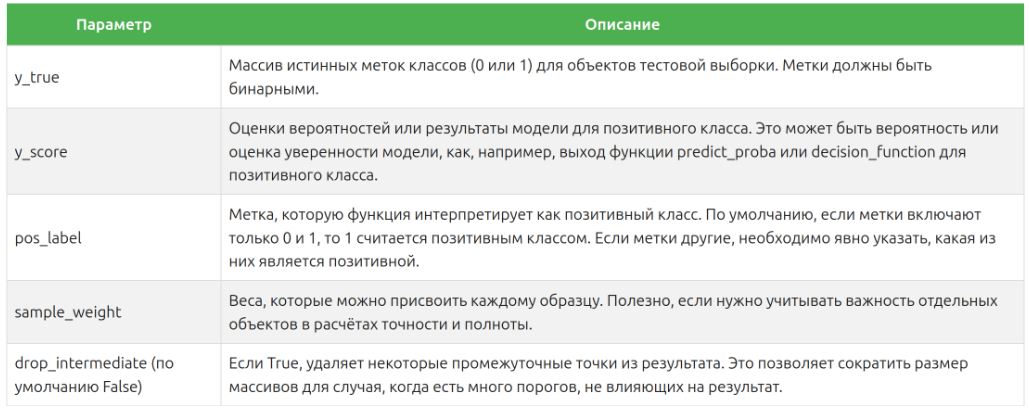

In [380]:
# Посмотрим на простой пример применения функции precision_recall_curve():

from sklearn.metrics import precision_recall_curve

# Истинные метки классов
y_true = [0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0]

# Предсказанные вероятности положительного класса
y_scores = [0.05, 0.25, 0.51, 0.8, 0.18, 0.7, 0.73, 0.68, 0.23, 0.68, 0.33, 0.46]

# Вычисление точности и полноты при разных порогах
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

print(f'Precision: {precision}', end='\n\n')
print(f'Recall: {recall}', end='\n\n')
print(f'Thresholds: {thresholds}')

Precision: [0.33333333 0.36363636 0.4        0.33333333 0.375      0.42857143
 0.5        0.6        0.66666667 0.5        1.         1.        ]

Recall: [1.   1.   1.   0.75 0.75 0.75 0.75 0.75 0.5  0.25 0.25 0.  ]

Thresholds: [0.05 0.18 0.23 0.25 0.33 0.46 0.51 0.68 0.7  0.73 0.8 ]


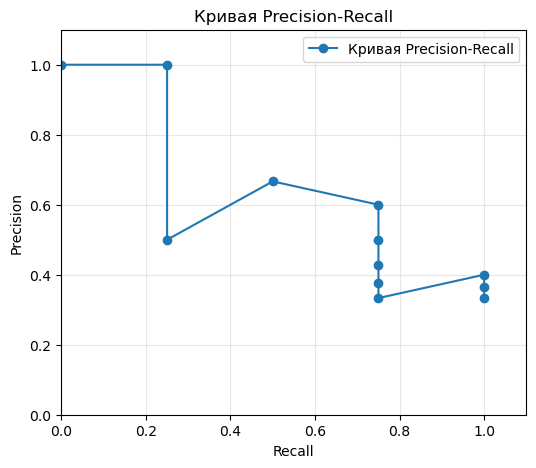

In [381]:
# Функция precision_recall_curve() часто используется в сочетании с построением графиков, 
# чтобы визуально оценить производительность модели. 

# Например, можно построить график, где по оси X откладывается полнота, а по оси Y – точность:

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))

plt.plot(recall, precision, marker='o', label='Кривая Precision-Recall')

plt.xlim(0, 1.1)
plt.ylim(0, 1.1)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Кривая Precision-Recall')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [382]:
# 1. Рассчитываются вероятности для каждого примера. 
# Это вероятности того, что объект принадлежит к классу 1.
# 2. Определяются различные пороги. 
# Каждое значение вероятности может быть использовано как порог. 
# Например, если порог равен 0.7, то объект будет отнесен к классу 1 только в том случае, 
# если вероятность принадлежности к этому классу больше 0.7.
# 3. Пересчитываются precision и recall. 
# Для каждого порога вычисляется precision и recall, определяющие, 
# сколько предсказаний класса 1 были корректными (precision) и сколько объектов класса 1 было выявлено (recall).
# 4. Построение кривой. 
# По мере изменения порога значения precision и recall изменяются, формируя кривую Precision-Recall.

In [383]:
# Давайте посмотрим на пример бинарной классификации, 
# который условно можно отнести к задаче определения мошеннических транзакций. 

# Сгенерируем данные, затем их разделим на обучающую и тестовую выборки. 
# Далее обучим модель случайного леса, и при помощи метода predict_proba() рассчитаем вероятности:

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Создаем синтетический набор данных
# Здесь класс 1 будет представлять мошеннические транзакции
X, y = make_classification(
    n_samples=1000,       # количество транзакций
    n_features=20,        # количество признаков
    n_classes=2,          # два класса: мошенническая (1) и легитимная (0)
    weights=[0.95, 0.05], # несимметричное распределение (5% мошеннических)
    random_state=42)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Обучаем модель
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_proba = model.predict_proba(X_test)[:, 1]

print(y_proba[:10])

[0.05 0.01 0.   0.   0.07 0.04 0.   0.   0.01 0.  ]


In [384]:
# Также распечатаем все уникальные значения вероятностей:

import numpy as np

print(np.unique(y_proba))

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.19 0.25 0.26 0.28 0.35 0.38 0.4  0.41 0.42 0.46 0.48
 0.54 0.56 0.58 0.6  0.64 0.67 0.72 0.73]


In [385]:
# И рассчитаем при помощи функции precision_recall_curve() точность и полноту 
# при разных порогах классификации:

from sklearn.metrics import precision_recall_curve

# Вычисляем Precision, Recall и пороги
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

print('Precision:', precision, end='\n\n')
print('Recall:', recall, end='\n\n')
print('Thresholds:', thresholds)

Precision: [0.05333333 0.07425743 0.09859155 0.12121212 0.17391304 0.20338983
 0.23529412 0.24444444 0.26190476 0.28947368 0.30555556 0.33333333
 0.34375    0.36666667 0.37037037 0.41666667 0.43478261 0.47619048
 0.5        0.52631579 0.55555556 0.58823529 0.5625     0.6
 0.64285714 0.69230769 0.66666667 0.72727273 0.8        0.88888889
 0.875      0.83333333 0.8        1.         1.         1.
 1.        ]

Recall: [1.     0.9375 0.875  0.75   0.75   0.75   0.75   0.6875 0.6875 0.6875
 0.6875 0.6875 0.6875 0.6875 0.625  0.625  0.625  0.625  0.625  0.625
 0.625  0.625  0.5625 0.5625 0.5625 0.5625 0.5    0.5    0.5    0.5
 0.4375 0.3125 0.25   0.25   0.1875 0.125  0.    ]

Thresholds: [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.19 0.25 0.26 0.28 0.35 0.38 0.4  0.41 0.42 0.46 0.48
 0.54 0.56 0.58 0.6  0.64 0.67 0.72 0.73]


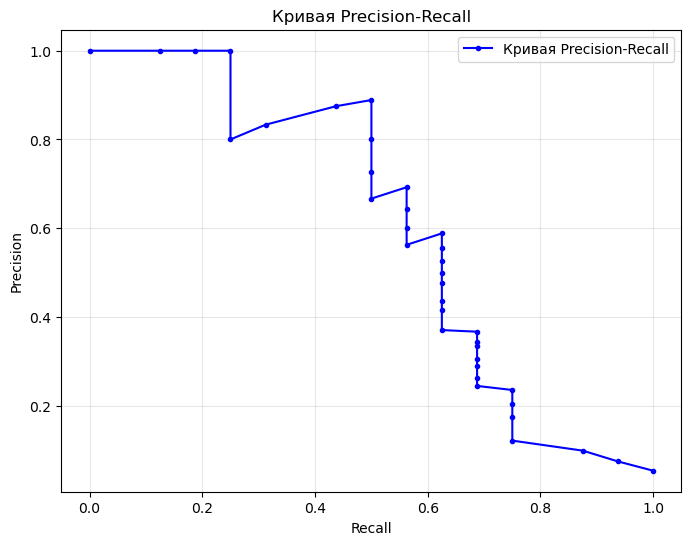

In [386]:
# Используя результат вывода функции precision_recall_curve(), построим кривую Precision-Recall:

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.plot(recall, precision, marker='.', color='b', label='Кривая Precision-Recall')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Кривая Precision-Recall')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

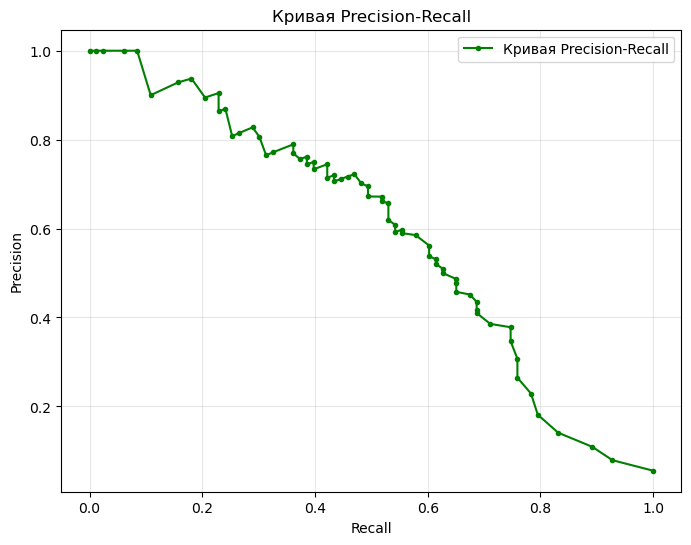

In [387]:
# Давайте увеличим количество примеров в датасете с 1000 до 5000 значений и построим кривую Precision-Recall:

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = make_classification(
    n_samples=5000,      
    n_features=20,        
    n_classes=2,          
    weights=[0.95, 0.05], 
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_proba = model.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', color='g', label='Кривая Precision-Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Кривая Precision-Recall')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [388]:
# Как видим, чем больше образцов в данных, тем более сглаженный вид принимает кривая Precision-Recall.

# Итак, построение кривой зависимости точности от полноты является ключевым шагом в выборе правильного порога классификации 
# для задач, где важно находить баланс между этими двумя метриками.

In [389]:
# Функция precision_recall_curve() работает только с бинарной классификацией. 
# Она предназначена для анализа способности модели различать два класса.

## Многоклассовые задачи precision_recall_curve()

In [390]:
# Для многоклассовых задач precision_recall_curve() можно использовать с преобразованием задачи 
# в несколько бинарных, применяя один из подходов:

# One-vs-Rest (OvR): 
# Модель рассматривает каждый класс как положительный, 
# а все остальные классы как отрицательные, создавая несколько бинарных классификаций. 
# Для каждой из них можно построить отдельную Precision-Recall кривую.

# One-vs-One (OvO): 
# Построение кривых Precision-Recall для каждой пары классов. 
# Однако этот подход менее популярен для кривых Precision-Recall.

In [391]:
# Для преобразования многоклассовой задачи в несколько бинарных
# потребуется функция label_binarize() библиотеки scikit-learn. 

# Эта функция имеет следующий синтаксис:

# label_binarize(y, *, classes, neg_label=0, pos_label=1, sparse_output=False)

# Функция импортируется из модуля sklearn.preprocessing:

from sklearn.preprocessing import label_binarize

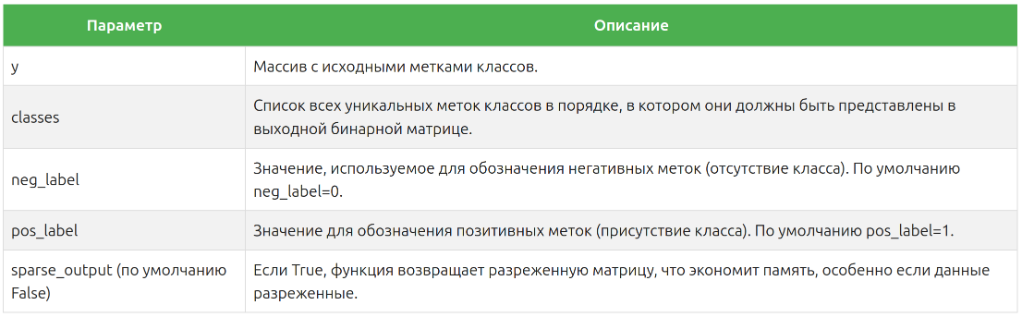

In [392]:
# Функция label_binarize() возвращает массив или разреженную матрицу с формой (n_samples, n_classes), где:

# Столбцы соответствуют классам из classes.
# Значения – либо pos_label, либо neg_label, показывают, принадлежит ли данный образец соответствующему классу.

In [393]:
# Для демонстрации примера создадим датасет, содержащий 3 класса и 100 образцов. 
# Затем данные разделим на обучающую и тестовую выборки. 
# Далее обучим модель случайного леса, и при помощи метода predict_proba() рассчитаем вероятности. 
# А также, применив функцию label_binarize(), произведём бинаризацию меток выборки y_test:

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

X, y = make_classification(
    n_samples=100,      
    n_features=6,        
    n_classes=3,
    n_informative=3,
    weights=[0.70, 0.20, 0.10], 
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_proba = model.predict_proba(X_test)

# Бинаризация меток y_test
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])

In [394]:
# Распечатаем исходный массив с истинными метками:

print(y_test)

[0 0 1 0 0 0 0 0 0 0 2 1 0 0 0 2 0 0 2 0 0 0 0 1 0 0 1 1 1 0]


In [395]:
# Посмотрим, как функция label_binarize() преобразовала этот массив:

print(y_test_binarized[:10])

[[1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [396]:
# И взглянем на вероятности:

print(y_proba[:10])

[[0.66 0.34 0.  ]
 [0.66 0.33 0.01]
 [0.08 0.45 0.47]
 [0.53 0.35 0.12]
 [0.72 0.25 0.03]
 [0.96 0.04 0.  ]
 [0.83 0.16 0.01]
 [0.77 0.23 0.  ]
 [0.65 0.35 0.  ]
 [0.56 0.39 0.05]]


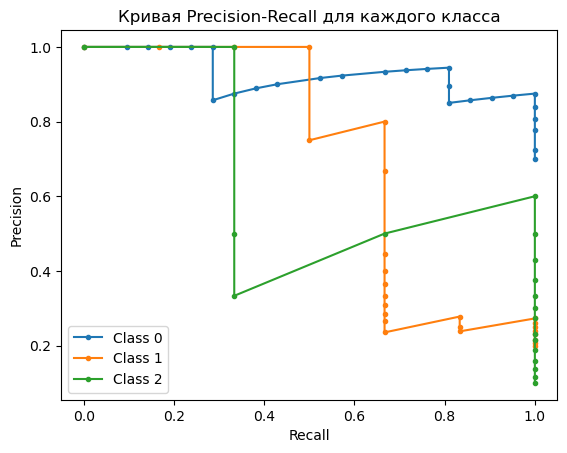

In [397]:
# И теперь, используя цикл, функцию precision_recall_curve() и инструменты библиотеки matplotlib, 
# построим кривые Precision-Recall для каждого класса следующим образом:

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

for i in range(y_test_binarized.shape[1]):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_proba[:, i])
    plt.plot(recall, precision, marker='.', label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Кривая Precision-Recall для каждого класса')
plt.legend()
plt.show()

In [398]:
# Таким образом можно строить кривые Precision-Recall в многоклассовых задачах и анализировать, 
# как ваша модель справляется с классификацией каждого класса в отдельности.

# Итак, функция precision_recall_curve – это важный инструмент для оценки качества моделей. 
# Она позволяет анализировать, как изменение порога классификации влияет на метрики точности и полноты, что важно для задач, 
# где последствия ошибок могут быть серьёзными (например, в медицине или безопасности). 
# Использование кривой Precision-Recall помогает лучше понимать, как модель справляется с предсказаниями положительного класса,
# и даёт возможность настроить модель под конкретные требования задачи.

## Задачи

In [399]:
# Вычислите вероятности принадлежности объектов к классам на тестовых данных.
# Используя функцию precision_recall_curve(), рассчитайте точность и полноту для разных порогов классификации.
# Выведите на печать массив значений точности.
# Распечатайте пустую строку.
# Выведите на печать массив значений полноты.
# Распечатайте пустую строку.
# Выведите на печать массив значений порогов классификации.

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# Добавьте необходимый импорт

num_1, num_2, num_3, num_4, num_5 = map(int, '200 10 2 5 42'.split())
X, y = make_classification(n_samples=num_1,                 # количество примеров
                           n_features=num_2,                # количество признаков
                           n_classes=num_3,                 # количество классов
                           n_informative=num_4,             # количество информативных признаков 
                           random_state=num_5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
# Продолжите написание кода здесь

y_proba = model.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

print(precision)
print()
print(recall)
print()
print(thresholds)

[0.5        0.51282051 0.52631579 0.54054054 0.55555556 0.57142857
 0.55882353 0.57575758 0.59375    0.61290323 0.63333333 0.65517241
 0.67857143 0.66666667 0.69230769 0.68       0.70833333 0.69565217
 0.72727273 0.71428571 0.7        0.68421053 0.66666667 0.64705882
 0.625      0.6        0.64285714 0.61538462 0.58333333 0.54545455
 0.6        0.66666667 0.625      0.57142857 0.5        0.4
 0.25       0.33333333 0.         0.         1.        ]

[1.   1.   1.   1.   1.   1.   0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.9
 0.9  0.85 0.85 0.8  0.8  0.75 0.7  0.65 0.6  0.55 0.5  0.45 0.45 0.4
 0.35 0.3  0.3  0.3  0.25 0.2  0.15 0.1  0.05 0.05 0.   0.   0.  ]

[0.03572268 0.07295636 0.07609927 0.09612356 0.10230668 0.1185978
 0.15081646 0.1516271  0.1920545  0.28062214 0.29793812 0.32330016
 0.42180086 0.46252088 0.48737092 0.51538293 0.54581839 0.55435272
 0.57709416 0.59997423 0.60710988 0.61313251 0.65016161 0.65622792
 0.68854402 0.69949902 0.69999967 0.70581008 0.70822905 0.72479745
 0.73

In [ ]:
# Выведите на печать:

# Массив со значениями точности для разных порогов для класса 0.
# Пустую строку.
# Массив со значениями полноты для разных порогов для класса 0.
# Пустую строку.
# Массив со значениями точности для разных порогов для класса 1.
# Пустую строку.
# Массив со значениями полноты для разных порогов для класса 1.
# Пустую строку.
# Массив со значениями точности для разных порогов для класса 2.
# Пустую строку.
# Массив со значениями полноты для разных порогов для класса 2.

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

num_1, num_2, num_3, num_4, num_5 = map(int, '100 10 3 5 42'.split())
X, y = make_classification(n_samples=num_1,                 # количество примеров
                           n_features=num_2,                # количество признаков
                           n_classes=num_3,                 # количество классов
                           n_informative=num_4,             # количество информативных признаков 
                           random_state=num_5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
# Продолжите написание кода здесь

y_test_binarized = label_binarize(y_test, classes=list(range(num_3)))
y_proba = model.predict_proba(X_test)

for i in range(y_test_binarized.shape[1]):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_proba[:, i])
    print(precision)
    print()
    print(recall)
    print()

[0.35       0.36842105 0.38888889 0.41176471 0.4375     0.46666667
 0.5        0.53846154 0.58333333 0.63636364 0.7        0.77777778
 0.875      0.85714286 0.83333333 0.8        1.         1.
 1.         1.         1.        ] 

[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         0.85714286 0.71428571 0.57142857 0.57142857 0.42857143
 0.28571429 0.14285714 0.        ] 

[0.35       0.36842105 0.38888889 0.41176471 0.4375     0.46666667
 0.5        0.53846154 0.58333333 0.63636364 0.7        0.66666667
 0.625      0.57142857 0.5        0.6        0.75       0.66666667
 1.         1.         1.        ] 

[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.85714286
 0.71428571 0.57142857 0.42857143 0.42857143 0.42857143 0.28571429
 0.28571429 0.14285714 0.        ] 

[0.3        0.31578947 0.33333333 0.35294118 0.375      0.4
 0.35714286 0.384615

# PrecisionRecallDisplay

In [ ]:
# Кривые Precision-Recall также можно строить, используя инструменты библиотеки scikit-learn, 
# а именно класс PrecisionRecallDisplay и метод plot() этого класса.

In [ ]:
# Класс PrecisionRecallDisplay имеет следующую сигнатуру:

# PrecisionRecallDisplay(precision, recall, *, average_precision=None, estimator_name=None, pos_label=None, 
#                        prevalence_pos_label=None)

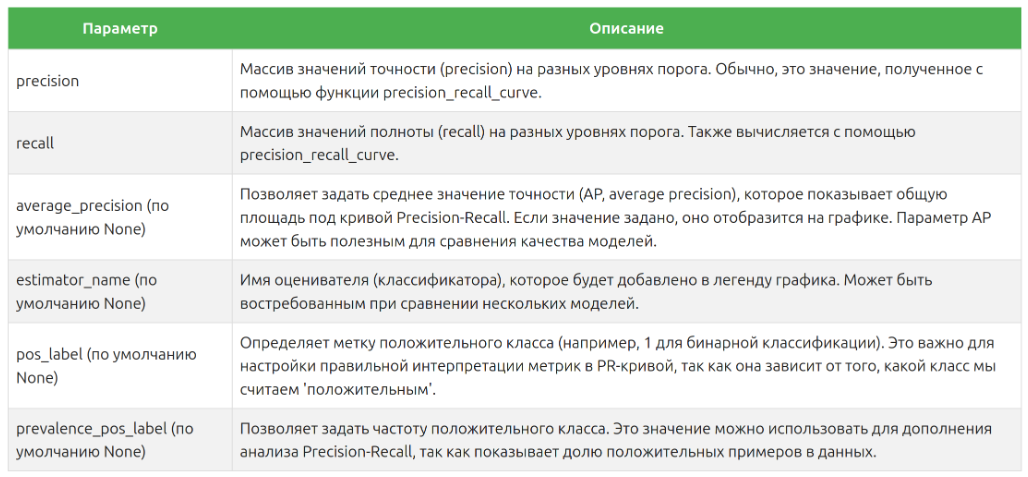

In [406]:
# Для демонстрации примера сгенерируем данные, затем их разделим на обучающую и тестовую выборки. 
# Далее обучим модель случайного леса, при помощи метода predict_proba() рассчитаем вероятности 
# и, используя функцию precision_recall_curve(), вычислим точность и полноту:

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=2000, n_classes=2, weights=[0.7, 0.3], random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

# Получаем вероятности положительного класса для модели
y_proba = model.predict_proba(X_test)[:, 1]

# Вычисляем precision и recall 
precision, recall, _ = precision_recall_curve(y_test, y_proba)

In [407]:
# Передадим значения precision и recall в PrecisionRecallDisplay:

from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay(precision=precision, recall=recall)

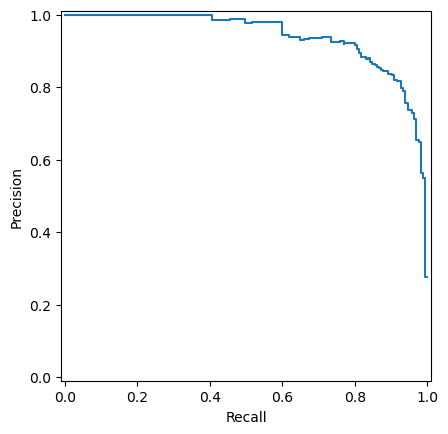

In [408]:
# Также, как и в случае с ConfusionMatrixDisplay, 
# происходит создание экземпляра класса PrecisionRecallDisplay, но визуализация не производится. 
# Для отображения графика, нужно к экземпляру класса PrecisionRecallDisplay применить метод plot():

from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

plt.show()

## Параметр average_precision класса PrecisionRecallDisplay

In [ ]:
# Параметр average_precision в классе PrecisionRecallDisplay используется 
# для отображения на графике значения средней точности (Average Precision, AP). 
# Это значение помогает количественно оценить качество модели по PR-кривой, 
# поскольку средняя точность (AP) представляет собой интегральную площадь под кривой Precision-Recall.

# Параметр average_precision не влияет на форму или положение кривой Precision-Recall на графике. 
# Этот параметр не используется для вычислений или построения кривой, 
# а лишь служит для отображения значения средней точности в легенде графика.

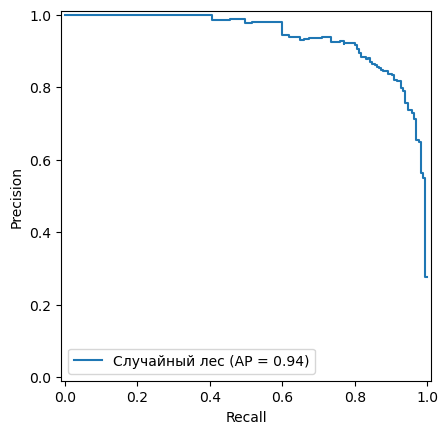

In [410]:
# Параметр average_precision используется для того, чтобы зрительно оценить производительность модели на основе одного числового показателя. 
# Он может быть рассчитан с помощью функции average_precision_score:

from sklearn.metrics import average_precision_score

# Вычисляем среднюю точность
ap_score = average_precision_score(y_test, y_proba)

disp = PrecisionRecallDisplay(precision=precision, recall=recall,
                              estimator_name='Случайный лес',
                              average_precision=ap_score)
disp.plot()

plt.show()

In [ ]:
# Здесь average_precision отобразится на графике (AP = 0.94), показывая, 
# как хорошо модель поддерживает высокую точность при увеличении полноты, но сама кривая останется неизменной.

# Средняя точность (AP) – это мера, которая усредняет значение точности модели при разных уровнях полноты. 
# Она не просто фиксирует значения точности и полноты в одной точке, как это делают метрики, основанные на фиксированных порогах, 
# а интегрирует значения точности по всем порогам, чтобы охарактеризовать всю кривую Precision-Recall.

# Когда мы говорим, что average_precision показывает, насколько хорошо модель поддерживает высокую точность 
# при увеличении полноты, это связано с тем, как эта метрика вычисляется:

# - Усреднение точности на всех уровнях полноты
# average_precision фактически подсчитывает площадь под кривой Precision-Recall. 
# Значение AP будет выше, если модель поддерживает высокую точность, даже когда полнота растет – 
# это указывает, что модель способна корректно находить положительные объекты без значительного количества ложных срабатываний.

# - Зависимость точности от полноты
# В большинстве моделей, когда полнота увеличивается (т.е., модель предсказывает больше объектов как положительные), 
# точность часто падает, поскольку увеличивается число ложных положительных. 
# Высокий AP указывает, что даже при высокой полноте модель сохраняет адекватный уровень точности, эффективно минимизируя ошибки.

# - Отличие от ROC-AUC
# В отличие от метрики ROC-AUC, AP более чувствителен к дисбалансу классов 
# и лучше отражает способность модели работать с редкими положительными метками, 
# поддерживая высокую точность при различных порогах полноты.

In [ ]:
# Таким образом, average_precision - это показатель того, 
# насколько «гладко» модель переходит от высокой точности к большей полноте, 
# помогая оценить, не жертвуется ли точность ради более высоких значений полноты.

## Параметр prevalence_pos_label класса PrecisionRecallDisplay

In [ ]:
# Параметр prevalence_pos_label позволяет указать частоту положительного класса (т.е. долю положительных примеров в данных), 
# чтобы добавить линию случайного угадывания на график Precision-Recall. 
# Эта линия показывает, какой уровень точности (precision) можно было бы получить, 
# если бы модель делала случайные предсказания для положительного класса с этой частотой.

# Параметр prevalence_pos_label также не изменяет саму кривую Precision-Recall, 
# поскольку кривая строится только на основе значений precision и recall. 
# Этот параметр отвечает только за добавление уровня случайного угадывания на графике, 
# и влияет на отображение только если вы укажете plot_chance_level=True при вызове метода plot().

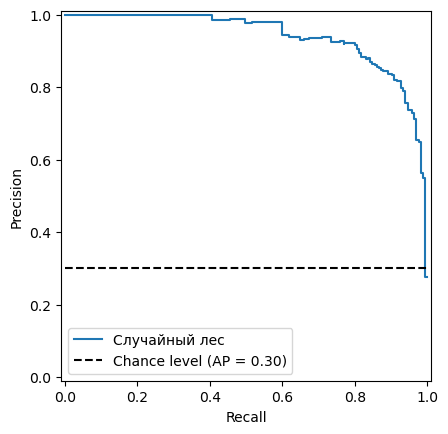

In [411]:
# Задать частоту положительного класса (prevalence_pos_label) означает указать долю (от 0 до 1), 
# которая соответствует положительному классу в выборке. 
# Например, если prevalence_pos_label=0.3, это значит, что положительный класс составляет 30% от общего числа примеров.

# Добавим линию случайного угадывания на график:

disp = PrecisionRecallDisplay(precision=precision, recall=recall,
                              estimator_name='Случайный лес',
                              prevalence_pos_label=0.3)
disp.plot(plot_chance_level=True)

plt.show()

In [ ]:
# Уровень случайного угадывания на Precision-Recall графике позволяет понять, 
# насколько модель лучше, чем случайные предсказания. 
# Если, например, частота положительного класса равна 0.3, 
# то случайное угадывание для положительного класса будет давать точность (precision) около 0.3. 
# Модель считается полезной, если её Precision-Recall кривая лежит выше этой линии, так как это показывает, 
# что она делает более информативные предсказания, чем случайная модель.

## Метод plot() класса PrecisionRecallDisplay

In [ ]:
# Метод plot() класса PrecisionRecallDisplay библиотеки scikit-learn 
# строит кривую Precision-Recall на заданной оси matplotlib. 

# Данный метод имеет следующий синтаксис:

# plot(ax=None, *, name=None, plot_chance_level=False, chance_level_kw=None, **kwargs)

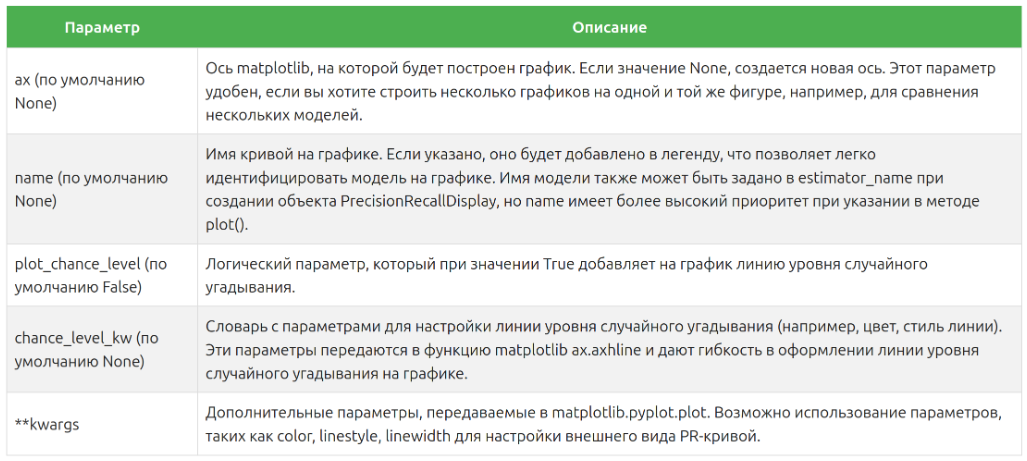

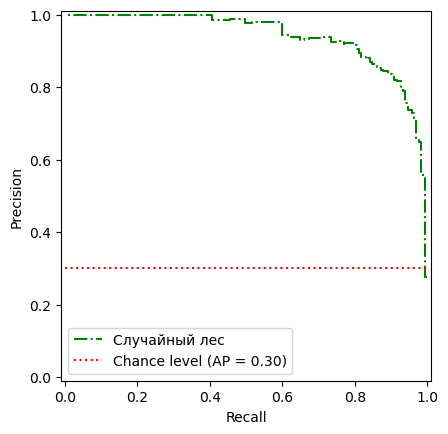

In [431]:
# Пример использования параметра chance_level_kw:

disp = PrecisionRecallDisplay(precision=precision, recall=recall,
                              estimator_name='Случайный лес',
                              prevalence_pos_label=0.3)
disp.plot(color='green',
          linestyle='-.',
          plot_chance_level=True,
          chance_level_kw={'color': 'red', 'linestyle': ':'})
plt.show()

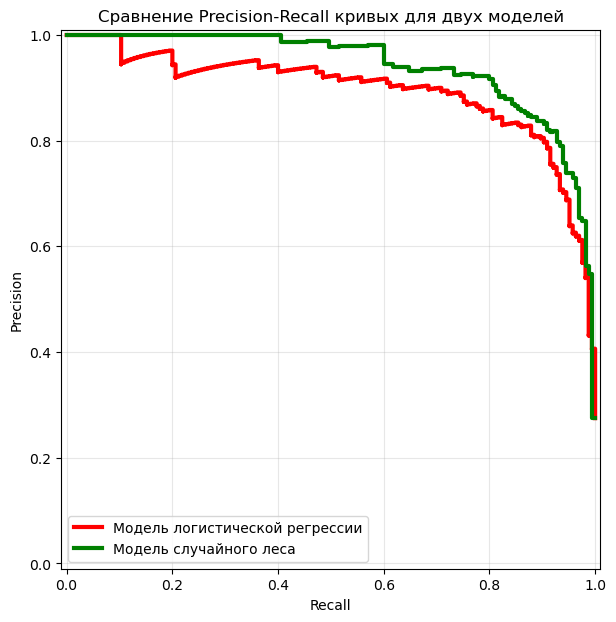

In [409]:
# PrecisionRecallDisplay также позволяет сравнивать между собой PR-кривые нескольких моделей. 
# Для примера сравним кривые Precision-Recall моделей логистической регрессии и случайного леса:

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Создаем синтетические данные
X, y = make_classification(n_samples=2000, n_classes=2, weights=[0.7, 0.3], random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучаем две модели
model1 = LogisticRegression(random_state=42)
model2 = RandomForestClassifier(random_state=42)

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# Получаем вероятности положительного класса для каждой модели
y_proba1 = model1.predict_proba(X_test)[:, 1]
y_proba2 = model2.predict_proba(X_test)[:, 1]

# Вычисляем precision и recall для каждой модели
precision1, recall1, _ = precision_recall_curve(y_test, y_proba1)
precision2, recall2, _ = precision_recall_curve(y_test, y_proba2)

# Создаем объект отображения для каждой модели и строим кривые
plt.figure(figsize=(7, 7))

disp1 = PrecisionRecallDisplay(precision=precision1, recall=recall1)
disp1.plot(name='Модель логистической регрессии', ax=plt.gca(), color='red', linewidth=3)

disp2 = PrecisionRecallDisplay(precision=precision2, recall=recall2)
disp2.plot(name='Модель случайного леса', ax=plt.gca(), color='green', linewidth=3)

# Настройка графика
plt.title('Сравнение Precision-Recall кривых для двух моделей')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# 1.10 roc_curve()

# Tail